# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:06:38.948768: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:06:41.724039
2025-04-14 20:06:41.724039


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 937
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:06:36"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

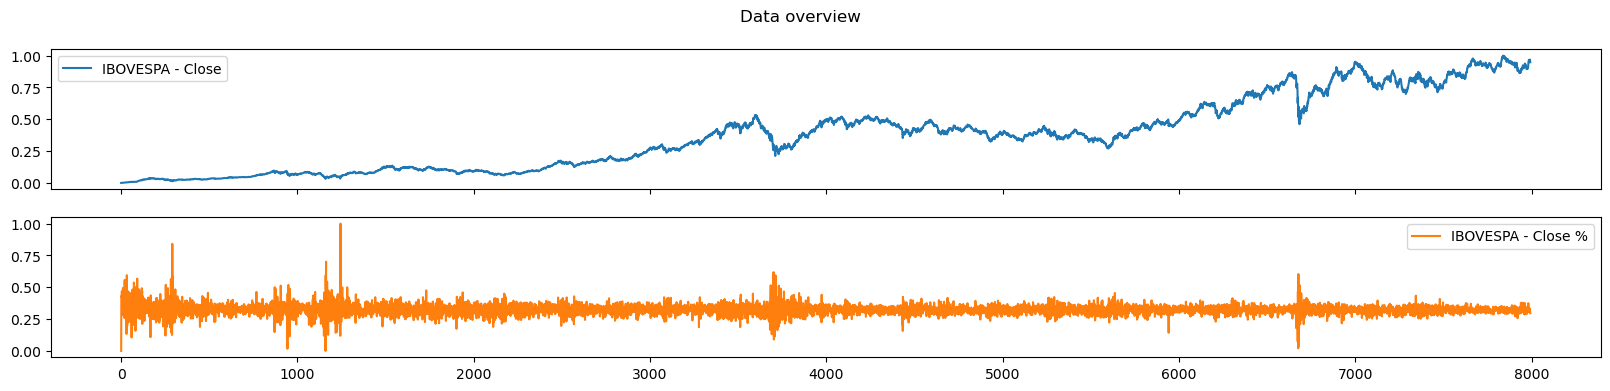

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

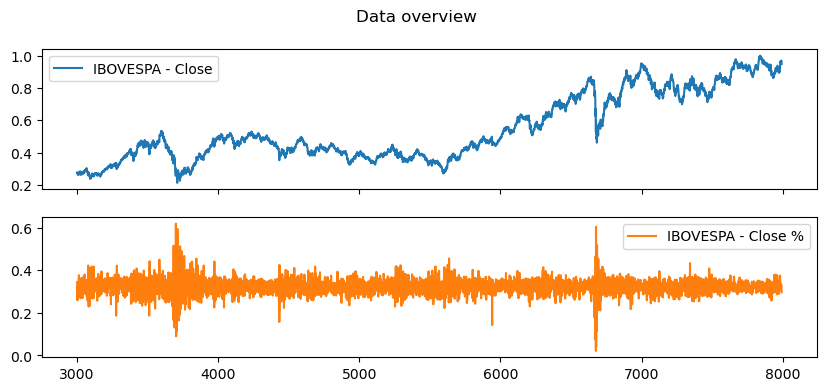

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

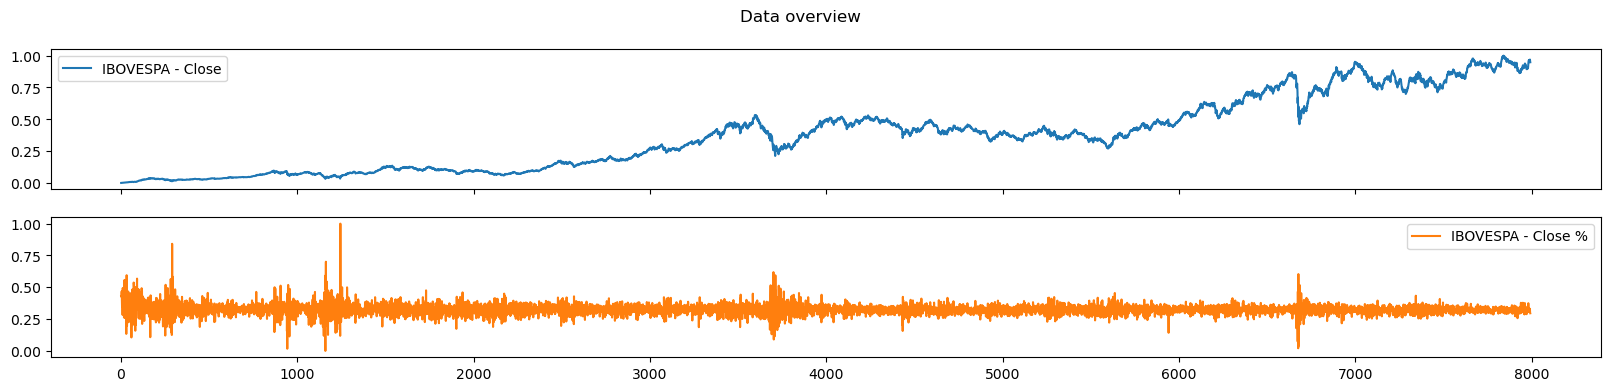

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

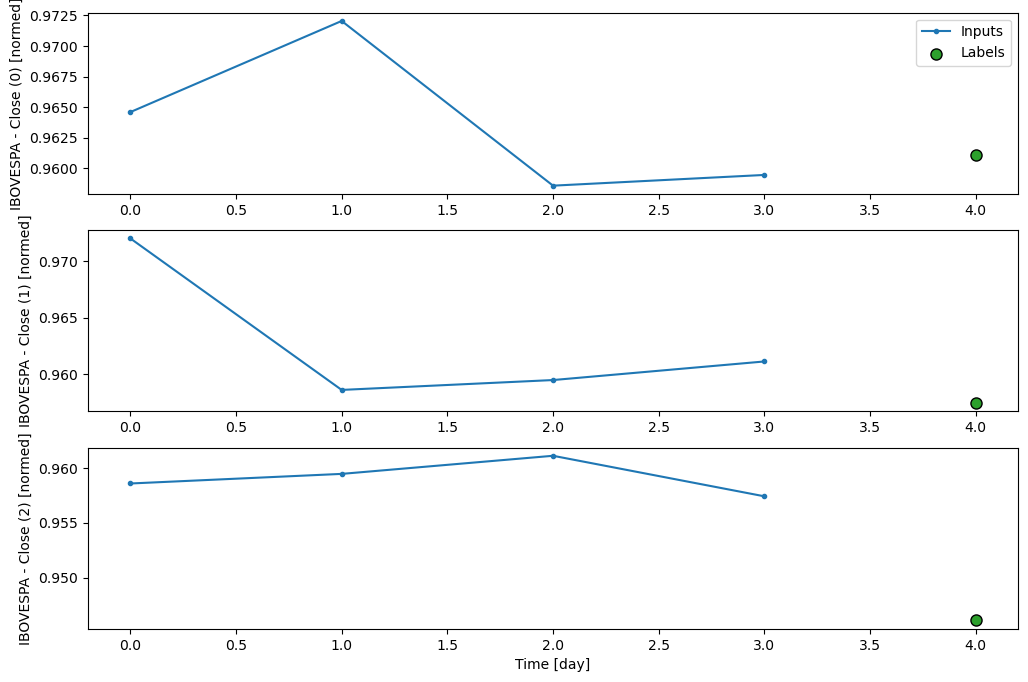

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:13 2s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 112.3790 - mean_squared_error: 2.4891e-04 - root_mean_squared_error: 0.0150 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 91.5234 - mean_squared_error: 2.4339e-04 - root_mean_squared_error: 0.0152 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 75.9311 - mean_squared_error: 2.1497e-04 - root_mean_squared_error: 0.0143

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 67.0565 - mean_squared_error: 2.0812e-04 - root_mean_squared_error: 0.0142

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 60.4303 - mean_squared_error: 2.0883e-04 - root_mean_squared_error: 0.0142

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.9014 - mean_squared_error: 2.1477e-04 - root_mean_squared_error: 0.0145

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.8423 - mean_squared_error: 2.1865e-04 - root_mean_squared_error: 0.0146

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.8904 - mean_squared_error: 2.2067e-04 - root_mean_squared_error: 0.0147

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 46.1894 - mean_squared_error: 2.2624e-04 - root_mean_squared_error: 0.0149

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 44.1082 - mean_squared_error: 2.3356e-04 - root_mean_squared_error: 0.0151

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 42.1274 - mean_squared_error: 2.5776e-04 - root_mean_squared_error: 0.0158

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 40.6113 - mean_squared_error: 3.1938e-04 - root_mean_squared_error: 0.0171

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 39.1623 - mean_squared_error: 4.1484e-04 - root_mean_squared_error: 0.0188

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 37.9389 - mean_squared_error: 5.7040e-04 - root_mean_squared_error: 0.0211

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 36.8085 - mean_squared_error: 7.0396e-04 - root_mean_squared_error: 0.0231

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 35.8612 - mean_squared_error: 8.0569e-04 - root_mean_squared_error: 0.0247

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 35.1649 - mean_squared_error: 8.7321e-04 - root_mean_squared_error: 0.0257

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 34.2317 - mean_squared_error: 9.5657e-04 - root_mean_squared_error: 0.0270

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 33.4519 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0280    

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 32.6811 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 31.9914 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 31.4086 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 30.8721 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 30.3216 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0347

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 29.8508 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 29.6995 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366 - val_loss: 0.2108 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 22.6762 - val_mean_squared_error: 0.0458 - val_root_mean_squared_error: 0.2140 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.5953 - mean_absolute_error: 0.5953 - mean_absolute_percentage_error: 25700.9844 - mean_squared_error: 0.3544 - root_mean_squared_error: 0.5953

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5600 - mean_absolute_error: 0.5600 - mean_absolute_percentage_error: 10722.3594 - mean_squared_error: 0.3157 - root_mean_squared_error: 0.5613 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4824 - mean_absolute_error: 0.4824 - mean_absolute_percentage_error: 7450.3911 - mean_squared_error: 0.2576 - root_mean_squared_error: 0.5027 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4029 - mean_absolute_error: 0.4029 - mean_absolute_percentage_error: 5687.1450 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4472

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3509 - mean_absolute_error: 0.3509 - mean_absolute_percentage_error: 4736.8232 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.4098

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3081 - mean_absolute_error: 0.3081 - mean_absolute_percentage_error: 4023.3057 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3777

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2788 - mean_absolute_error: 0.2788 - mean_absolute_percentage_error: 3558.1443 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3546

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2531 - mean_absolute_error: 0.2531 - mean_absolute_percentage_error: 3163.8364 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3336

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 2883.5344 - mean_squared_error: 0.1154 - root_mean_squared_error: 0.3176

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2169 - mean_absolute_error: 0.2169 - mean_absolute_percentage_error: 2630.2766 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.3024

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 2441.0137 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.2906

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 2263.1426 - mean_squared_error: 0.0923 - root_mean_squared_error: 0.2790

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1807 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 2111.7708 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2688

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1727 - mean_absolute_error: 0.1727 - mean_absolute_percentage_error: 1993.5731 - mean_squared_error: 0.0820 - root_mean_squared_error: 0.2607

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1651 - mean_absolute_error: 0.1651 - mean_absolute_percentage_error: 1878.2987 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2527

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 1786.4392 - mean_squared_error: 0.0742 - root_mean_squared_error: 0.2461

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1530 - mean_absolute_error: 0.1530 - mean_absolute_percentage_error: 1695.3373 - mean_squared_error: 0.0707 - root_mean_squared_error: 0.2395

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 1621.6647 - mean_squared_error: 0.0678 - root_mean_squared_error: 0.2340

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 1547.6514 - mean_squared_error: 0.0650 - root_mean_squared_error: 0.2283

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - mean_absolute_percentage_error: 1487.1239 - mean_squared_error: 0.0626 - root_mean_squared_error: 0.2235

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 1431.6047 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2191

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 1380.4805 - mean_squared_error: 0.0585 - root_mean_squared_error: 0.2150

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1282 - mean_absolute_error: 0.1282 - mean_absolute_percentage_error: 1328.1816 - mean_squared_error: 0.0564 - root_mean_squared_error: 0.2107

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1257 - mean_absolute_error: 0.1257 - mean_absolute_percentage_error: 1289.3835 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2076

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 1253.0042 - mean_squared_error: 0.0535 - root_mean_squared_error: 0.2046

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 1214.6794 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2015

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 1194.4880 - mean_squared_error: 0.0513 - root_mean_squared_error: 0.1998 - val_loss: 0.1096 - val_mean_absolute_error: 0.1096 - val_mean_absolute_percentage_error: 11.7211 - val_mean_squared_error: 0.0131 - val_root_mean_squared_error: 0.1144 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5233 - mean_absolute_error: 0.5233 - mean_absolute_percentage_error: 22578.7422 - mean_squared_error: 0.2739 - root_mean_squared_error: 0.5234

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5054 - mean_absolute_error: 0.5054 - mean_absolute_percentage_error: 9487.3525 - mean_squared_error: 0.2561 - root_mean_squared_error: 0.5059  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4522 - mean_absolute_error: 0.4522 - mean_absolute_percentage_error: 6488.5449 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4622

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4056 - mean_absolute_error: 0.4056 - mean_absolute_percentage_error: 5177.6704 - mean_squared_error: 0.1855 - root_mean_squared_error: 0.4250

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3635 - mean_absolute_error: 0.3635 - mean_absolute_percentage_error: 4277.7217 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3919

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 3669.8813 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3651

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 3266.4802 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3451

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2783 - mean_absolute_error: 0.2783 - mean_absolute_percentage_error: 2920.1807 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3264

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 2671.7395 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.3120

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - mean_absolute_percentage_error: 2445.5493 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.2982

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 2275.4810 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2872

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 2114.8596 - mean_squared_error: 0.0872 - root_mean_squared_error: 0.2764

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 1990.3640 - mean_squared_error: 0.0825 - root_mean_squared_error: 0.2677

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 1881.1588 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2598

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 1784.5111 - mean_squared_error: 0.0747 - root_mean_squared_error: 0.2527

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 1698.2843 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2463

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1754 - mean_absolute_error: 0.1754 - mean_absolute_percentage_error: 1620.8203 - mean_squared_error: 0.0684 - root_mean_squared_error: 0.2403

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1690 - mean_absolute_error: 0.1690 - mean_absolute_percentage_error: 1543.4244 - mean_squared_error: 0.0654 - root_mean_squared_error: 0.2342

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 1480.4314 - mean_squared_error: 0.0630 - root_mean_squared_error: 0.2291

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 1416.7808 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2238

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 1364.4552 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2194

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1493 - mean_absolute_error: 0.1493 - mean_absolute_percentage_error: 1311.0969 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2148

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 1266.8611 - mean_squared_error: 0.0546 - root_mean_squared_error: 0.2109

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 1225.8080 - mean_squared_error: 0.0529 - root_mean_squared_error: 0.2073

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - mean_absolute_percentage_error: 1187.5941 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2040

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 1151.9165 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2008

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1347 - mean_absolute_error: 0.1347 - mean_absolute_percentage_error: 1136.8152 - mean_squared_error: 0.0494 - root_mean_squared_error: 0.1995 - val_loss: 0.0332 - val_mean_absolute_error: 0.0332 - val_mean_absolute_percentage_error: 3.5375 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0377 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 11547.7480 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2680

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 4751.5645 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2403  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - mean_absolute_percentage_error: 3244.5024 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.2066

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 2461.9287 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1813

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 2046.4884 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1653

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 1736.4154 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1519

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 1515.3596 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1414

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 1348.8835 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1329

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 1230.2798 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1265

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 1152.8947 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1222

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 1067.9580 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1172

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 995.8444 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1128 

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 933.7560 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1090

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 879.6626 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1055

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 832.0604 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1024

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 789.8074 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0995

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 748.0693 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0966

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 714.4423 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0943

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 680.7703 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0918

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 650.4113 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0895

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 625.5215 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0877

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 602.6360 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0859

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 581.5157 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0842

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 561.9611 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0827

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 543.8027 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0813

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 526.8901 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0799

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 512.8013 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0788 - val_loss: 0.0196 - val_mean_absolute_error: 0.0196 - val_mean_absolute_percentage_error: 2.0836 - val_mean_squared_error: 4.9020e-04 - val_root_mean_squared_error: 0.0221 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 562.5869 - mean_squared_error: 2.5520e-04 - root_mean_squared_error: 0.0160

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 210.1363 - mean_squared_error: 1.4017e-04 - root_mean_squared_error: 0.0117 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 146.0770 - mean_squared_error: 1.1827e-04 - root_mean_squared_error: 0.0108

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 114.2053 - mean_squared_error: 1.1029e-04 - root_mean_squared_error: 0.0104

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 98.8625 - mean_squared_error: 1.1116e-04 - root_mean_squared_error: 0.0105 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 86.8887 - mean_squared_error: 1.1226e-04 - root_mean_squared_error: 0.0105

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 78.1689 - mean_squared_error: 1.1914e-04 - root_mean_squared_error: 0.0108

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 70.7003 - mean_squared_error: 1.2393e-04 - root_mean_squared_error: 0.0111

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 65.3825 - mean_squared_error: 1.2613e-04 - root_mean_squared_error: 0.0112

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 60.5506 - mean_squared_error: 1.2787e-04 - root_mean_squared_error: 0.0112

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 56.9209 - mean_squared_error: 1.3034e-04 - root_mean_squared_error: 0.0114

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 53.4562 - mean_squared_error: 1.3257e-04 - root_mean_squared_error: 0.0115

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 50.7413 - mean_squared_error: 1.3449e-04 - root_mean_squared_error: 0.0115

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 48.3392 - mean_squared_error: 1.3703e-04 - root_mean_squared_error: 0.0116

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 46.1976 - mean_squared_error: 1.3978e-04 - root_mean_squared_error: 0.0118

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.0623 - mean_squared_error: 1.4202e-04 - root_mean_squared_error: 0.0119

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.1432 - mean_squared_error: 1.4345e-04 - root_mean_squared_error: 0.0119

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.5734 - mean_squared_error: 1.4415e-04 - root_mean_squared_error: 0.0120

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 38.9805 - mean_squared_error: 1.4444e-04 - root_mean_squared_error: 0.0120

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 37.6661 - mean_squared_error: 1.4438e-04 - root_mean_squared_error: 0.0120

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 36.3213 - mean_squared_error: 1.4407e-04 - root_mean_squared_error: 0.0120

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 35.2022 - mean_squared_error: 1.4362e-04 - root_mean_squared_error: 0.0119

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 34.3858 - mean_squared_error: 1.4329e-04 - root_mean_squared_error: 0.0119

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 33.5053 - mean_squared_error: 1.4309e-04 - root_mean_squared_error: 0.0119

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 32.4768 - mean_squared_error: 1.4320e-04 - root_mean_squared_error: 0.0119

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 31.6126 - mean_squared_error: 1.4353e-04 - root_mean_squared_error: 0.0119

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 30.8885 - mean_squared_error: 1.4381e-04 - root_mean_squared_error: 0.0120 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9277 - val_mean_squared_error: 1.1503e-04 - val_root_mean_squared_error: 0.0107 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 1316.3674 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0324

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 473.5556 - mean_squared_error: 5.4149e-04 - root_mean_squared_error: 0.0228

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 328.5253 - mean_squared_error: 4.1046e-04 - root_mean_squared_error: 0.0196

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 252.9611 - mean_squared_error: 3.3825e-04 - root_mean_squared_error: 0.0177

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 212.2697 - mean_squared_error: 2.9719e-04 - root_mean_squared_error: 0.0166

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 181.7483 - mean_squared_error: 2.6575e-04 - root_mean_squared_error: 0.0156

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 161.7282 - mean_squared_error: 2.4443e-04 - root_mean_squared_error: 0.0150

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 144.6671 - mean_squared_error: 2.2546e-04 - root_mean_squared_error: 0.0143

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 132.5009 - mean_squared_error: 2.1141e-04 - root_mean_squared_error: 0.0139

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 121.4299 - mean_squared_error: 1.9802e-04 - root_mean_squared_error: 0.0134

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 113.1029 - mean_squared_error: 1.8759e-04 - root_mean_squared_error: 0.0130

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 105.2380 - mean_squared_error: 1.7771e-04 - root_mean_squared_error: 0.0126

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 99.1431 - mean_squared_error: 1.7040e-04 - root_mean_squared_error: 0.0124 

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 93.2619 - mean_squared_error: 1.6601e-04 - root_mean_squared_error: 0.0122

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 88.6180 - mean_squared_error: 1.6497e-04 - root_mean_squared_error: 0.0122

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 84.0372 - mean_squared_error: 1.6435e-04 - root_mean_squared_error: 0.0123

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 80.3474 - mean_squared_error: 1.6355e-04 - root_mean_squared_error: 0.0123

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 76.6524 - mean_squared_error: 1.6239e-04 - root_mean_squared_error: 0.0122

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 73.3212 - mean_squared_error: 1.6108e-04 - root_mean_squared_error: 0.0122

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 70.5912 - mean_squared_error: 1.5988e-04 - root_mean_squared_error: 0.0122

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 68.0828 - mean_squared_error: 1.5882e-04 - root_mean_squared_error: 0.0122

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 65.7691 - mean_squared_error: 1.5810e-04 - root_mean_squared_error: 0.0122

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 63.4002 - mean_squared_error: 1.5812e-04 - root_mean_squared_error: 0.0122

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 61.4286 - mean_squared_error: 1.5875e-04 - root_mean_squared_error: 0.0122

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 59.3939 - mean_squared_error: 1.5953e-04 - root_mean_squared_error: 0.0123

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 57.5061 - mean_squared_error: 1.6031e-04 - root_mean_squared_error: 0.0123 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7710 - val_mean_squared_error: 7.6220e-05 - val_root_mean_squared_error: 0.0087 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 2322.2168 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0547

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 909.8075 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0423  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 610.3542 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 485.9159 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 401.0409 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 348.9136 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0315

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 310.0232 - mean_squared_error: 9.5149e-04 - root_mean_squared_error: 0.0299

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 285.8982 - mean_squared_error: 8.9138e-04 - root_mean_squared_error: 0.0288

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 263.0166 - mean_squared_error: 8.3220e-04 - root_mean_squared_error: 0.0277

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 241.7247 - mean_squared_error: 7.7531e-04 - root_mean_squared_error: 0.0266

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 222.1676 - mean_squared_error: 7.2158e-04 - root_mean_squared_error: 0.0256

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 207.3526 - mean_squared_error: 6.7999e-04 - root_mean_squared_error: 0.0247

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 193.2734 - mean_squared_error: 6.3986e-04 - root_mean_squared_error: 0.0239

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 182.3078 - mean_squared_error: 6.0856e-04 - root_mean_squared_error: 0.0232

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 171.6440 - mean_squared_error: 5.7804e-04 - root_mean_squared_error: 0.0225

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 163.1656 - mean_squared_error: 5.5354e-04 - root_mean_squared_error: 0.0220

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 154.7735 - mean_squared_error: 5.2911e-04 - root_mean_squared_error: 0.0214

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 147.2880 - mean_squared_error: 5.0714e-04 - root_mean_squared_error: 0.0209

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 140.5655 - mean_squared_error: 4.8727e-04 - root_mean_squared_error: 0.0205

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 135.0728 - mean_squared_error: 4.7096e-04 - root_mean_squared_error: 0.0201

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 130.0372 - mean_squared_error: 4.5596e-04 - root_mean_squared_error: 0.0197

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 124.9088 - mean_squared_error: 4.4062e-04 - root_mean_squared_error: 0.0194

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 120.6621 - mean_squared_error: 4.2795e-04 - root_mean_squared_error: 0.0191

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 116.3046 - mean_squared_error: 4.1532e-04 - root_mean_squared_error: 0.0187

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 112.6713 - mean_squared_error: 4.0510e-04 - root_mean_squared_error: 0.0185

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 108.9190 - mean_squared_error: 3.9476e-04 - root_mean_squared_error: 0.0183

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 107.1456 - mean_squared_error: 3.8989e-04 - root_mean_squared_error: 0.0181 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0487 - val_mean_squared_error: 1.3824e-04 - val_root_mean_squared_error: 0.0118 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 1615.3759 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 619.5723 - mean_squared_error: 8.1448e-04 - root_mean_squared_error: 0.0280

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 421.0910 - mean_squared_error: 6.1844e-04 - root_mean_squared_error: 0.0242

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 327.6568 - mean_squared_error: 5.0688e-04 - root_mean_squared_error: 0.0217

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 271.1808 - mean_squared_error: 4.3219e-04 - root_mean_squared_error: 0.0199

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 229.4607 - mean_squared_error: 3.7388e-04 - root_mean_squared_error: 0.0183

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 202.5041 - mean_squared_error: 3.3484e-04 - root_mean_squared_error: 0.0172

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 179.7863 - mean_squared_error: 3.0113e-04 - root_mean_squared_error: 0.0162

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 162.1451 - mean_squared_error: 2.7445e-04 - root_mean_squared_error: 0.0154

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 149.2751 - mean_squared_error: 2.5473e-04 - root_mean_squared_error: 0.0147

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 138.4989 - mean_squared_error: 2.3811e-04 - root_mean_squared_error: 0.0142

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 129.3289 - mean_squared_error: 2.2402e-04 - root_mean_squared_error: 0.0137

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 121.4190 - mean_squared_error: 2.1206e-04 - root_mean_squared_error: 0.0133

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 114.5245 - mean_squared_error: 2.0244e-04 - root_mean_squared_error: 0.0130

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 108.4672 - mean_squared_error: 1.9612e-04 - root_mean_squared_error: 0.0128

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 103.0911 - mean_squared_error: 1.9148e-04 - root_mean_squared_error: 0.0127

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 98.2799 - mean_squared_error: 1.8739e-04 - root_mean_squared_error: 0.0126 

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 93.9440 - mean_squared_error: 1.8354e-04 - root_mean_squared_error: 0.0125

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 89.6003 - mean_squared_error: 1.7949e-04 - root_mean_squared_error: 0.0124

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 86.0575 - mean_squared_error: 1.7612e-04 - root_mean_squared_error: 0.0123

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 83.1616 - mean_squared_error: 1.7333e-04 - root_mean_squared_error: 0.0123

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 80.8009 - mean_squared_error: 1.7107e-04 - root_mean_squared_error: 0.0122

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 77.9773 - mean_squared_error: 1.6849e-04 - root_mean_squared_error: 0.0121

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 75.3669 - mean_squared_error: 1.6651e-04 - root_mean_squared_error: 0.0121

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 72.6896 - mean_squared_error: 1.6584e-04 - root_mean_squared_error: 0.0121

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 70.2187 - mean_squared_error: 1.6626e-04 - root_mean_squared_error: 0.0121

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 67.9295 - mean_squared_error: 1.6690e-04 - root_mean_squared_error: 0.0122 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7850 - val_mean_squared_error: 7.8860e-05 - val_root_mean_squared_error: 0.0089 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 3027.7222 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0707

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 1204.2034 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 820.0375 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 623.8653 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 519.1982 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 447.6440 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 395.1829 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 354.8555 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 322.8277 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 294.0558 - mean_squared_error: 9.6496e-04 - root_mean_squared_error: 0.0286

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 272.6332 - mean_squared_error: 8.9988e-04 - root_mean_squared_error: 0.0274

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 254.4194 - mean_squared_error: 8.4426e-04 - root_mean_squared_error: 0.0265

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 238.7212 - mean_squared_error: 7.9630e-04 - root_mean_squared_error: 0.0256

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 223.6262 - mean_squared_error: 7.5082e-04 - root_mean_squared_error: 0.0248

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 210.5222 - mean_squared_error: 7.1280e-04 - root_mean_squared_error: 0.0241

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 200.1067 - mean_squared_error: 6.8301e-04 - root_mean_squared_error: 0.0236

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 189.7965 - mean_squared_error: 6.5343e-04 - root_mean_squared_error: 0.0230

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 180.5968 - mean_squared_error: 6.2672e-04 - root_mean_squared_error: 0.0225

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 173.1210 - mean_squared_error: 6.0481e-04 - root_mean_squared_error: 0.0221

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 166.2999 - mean_squared_error: 5.8469e-04 - root_mean_squared_error: 0.0217

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 160.0482 - mean_squared_error: 5.6613e-04 - root_mean_squared_error: 0.0214

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 154.2946 - mean_squared_error: 5.4896e-04 - root_mean_squared_error: 0.0210

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 148.4146 - mean_squared_error: 5.3141e-04 - root_mean_squared_error: 0.0207

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 143.5314 - mean_squared_error: 5.1742e-04 - root_mean_squared_error: 0.0204

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 138.5070 - mean_squared_error: 5.0358e-04 - root_mean_squared_error: 0.0201

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 134.3063 - mean_squared_error: 4.9222e-04 - root_mean_squared_error: 0.0199

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 132.0930 - mean_squared_error: 4.8625e-04 - root_mean_squared_error: 0.0198 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7523 - val_mean_squared_error: 7.7308e-05 - val_root_mean_squared_error: 0.0088 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 1726.7913 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0406

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 664.1811 - mean_squared_error: 9.0851e-04 - root_mean_squared_error: 0.0294

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 432.7878 - mean_squared_error: 6.3787e-04 - root_mean_squared_error: 0.0243

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 331.9028 - mean_squared_error: 5.1581e-04 - root_mean_squared_error: 0.0217

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 277.5966 - mean_squared_error: 4.4531e-04 - root_mean_squared_error: 0.0200

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 247.4374 - mean_squared_error: 4.0402e-04 - root_mean_squared_error: 0.0190

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 217.9620 - mean_squared_error: 3.6212e-04 - root_mean_squared_error: 0.0179

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 193.2044 - mean_squared_error: 3.2576e-04 - root_mean_squared_error: 0.0168

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 175.7545 - mean_squared_error: 2.9953e-04 - root_mean_squared_error: 0.0161

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 160.0808 - mean_squared_error: 2.7557e-04 - root_mean_squared_error: 0.0153

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 148.4138 - mean_squared_error: 2.5748e-04 - root_mean_squared_error: 0.0148

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 137.4848 - mean_squared_error: 2.4044e-04 - root_mean_squared_error: 0.0142

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 129.0727 - mean_squared_error: 2.2743e-04 - root_mean_squared_error: 0.0138

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 120.9777 - mean_squared_error: 2.1537e-04 - root_mean_squared_error: 0.0134

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 114.6009 - mean_squared_error: 2.0601e-04 - root_mean_squared_error: 0.0131

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 108.3365 - mean_squared_error: 1.9681e-04 - root_mean_squared_error: 0.0128

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 103.3148 - mean_squared_error: 1.8947e-04 - root_mean_squared_error: 0.0125

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 98.3082 - mean_squared_error: 1.8213e-04 - root_mean_squared_error: 0.0123 

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 94.2418 - mean_squared_error: 1.7618e-04 - root_mean_squared_error: 0.0121

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 90.5329 - mean_squared_error: 1.7076e-04 - root_mean_squared_error: 0.0119

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 87.1345 - mean_squared_error: 1.6580e-04 - root_mean_squared_error: 0.0117

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 84.0072 - mean_squared_error: 1.6124e-04 - root_mean_squared_error: 0.0115

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 81.1194 - mean_squared_error: 1.5713e-04 - root_mean_squared_error: 0.0114

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 78.4447 - mean_squared_error: 1.5378e-04 - root_mean_squared_error: 0.0113

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 75.9598 - mean_squared_error: 1.5110e-04 - root_mean_squared_error: 0.0112

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 73.6436 - mean_squared_error: 1.4871e-04 - root_mean_squared_error: 0.0111

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 71.9483 - mean_squared_error: 1.4706e-04 - root_mean_squared_error: 0.0111 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7732 - val_mean_squared_error: 7.5818e-05 - val_root_mean_squared_error: 0.0087 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 766.3452 - mean_squared_error: 3.4121e-04 - root_mean_squared_error: 0.0185

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 286.4598 - mean_squared_error: 1.9174e-04 - root_mean_squared_error: 0.0137 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 190.4657 - mean_squared_error: 1.5144e-04 - root_mean_squared_error: 0.0121

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 151.1101 - mean_squared_error: 1.3158e-04 - root_mean_squared_error: 0.0113

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 126.9493 - mean_squared_error: 1.1909e-04 - root_mean_squared_error: 0.0107

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 110.4504 - mean_squared_error: 1.1023e-04 - root_mean_squared_error: 0.0103

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 98.2246 - mean_squared_error: 1.0281e-04 - root_mean_squared_error: 0.0099 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 88.7210 - mean_squared_error: 9.6269e-05 - root_mean_squared_error: 0.0096

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 80.3405 - mean_squared_error: 8.9922e-05 - root_mean_squared_error: 0.0092

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 73.5794 - mean_squared_error: 8.4467e-05 - root_mean_squared_error: 0.0089

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 67.9914 - mean_squared_error: 7.9767e-05 - root_mean_squared_error: 0.0086

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 63.7222 - mean_squared_error: 7.6120e-05 - root_mean_squared_error: 0.0084

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 59.6368 - mean_squared_error: 7.2794e-05 - root_mean_squared_error: 0.0082

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 56.4397 - mean_squared_error: 7.0647e-05 - root_mean_squared_error: 0.0081

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 53.6083 - mean_squared_error: 6.8824e-05 - root_mean_squared_error: 0.0080

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 51.0801 - mean_squared_error: 6.7209e-05 - root_mean_squared_error: 0.0079

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 48.5692 - mean_squared_error: 6.5624e-05 - root_mean_squared_error: 0.0078

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 46.7524 - mean_squared_error: 6.4453e-05 - root_mean_squared_error: 0.0078

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 45.2844 - mean_squared_error: 6.3504e-05 - root_mean_squared_error: 0.0077

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 43.5447 - mean_squared_error: 6.2433e-05 - root_mean_squared_error: 0.0076

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 41.9506 - mean_squared_error: 6.1468e-05 - root_mean_squared_error: 0.0076

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 40.4833 - mean_squared_error: 6.0598e-05 - root_mean_squared_error: 0.0075

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 39.1276 - mean_squared_error: 5.9862e-05 - root_mean_squared_error: 0.0075

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 37.7377 - mean_squared_error: 5.9462e-05 - root_mean_squared_error: 0.0075

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 36.5806 - mean_squared_error: 5.9713e-05 - root_mean_squared_error: 0.0075

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 35.5015 - mean_squared_error: 6.0132e-05 - root_mean_squared_error: 0.0075

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 34.4929 - mean_squared_error: 6.0669e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9649 - val_mean_squared_error: 1.1213e-04 - val_root_mean_squared_error: 0.0106 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 981.5497 - mean_squared_error: 5.4379e-04 - root_mean_squared_error: 0.0233

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 364.5638 - mean_squared_error: 2.6513e-04 - root_mean_squared_error: 0.0158 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 234.7072 - mean_squared_error: 1.7923e-04 - root_mean_squared_error: 0.0127

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 182.1819 - mean_squared_error: 1.4203e-04 - root_mean_squared_error: 0.0112

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 150.6969 - mean_squared_error: 1.1982e-04 - root_mean_squared_error: 0.0102

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 129.6096 - mean_squared_error: 1.0556e-04 - root_mean_squared_error: 0.0095

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 112.9110 - mean_squared_error: 9.5768e-05 - root_mean_squared_error: 0.0091

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 101.5950 - mean_squared_error: 8.9230e-05 - root_mean_squared_error: 0.0088

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 91.7163 - mean_squared_error: 8.3231e-05 - root_mean_squared_error: 0.0085 

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 84.5075 - mean_squared_error: 7.8609e-05 - root_mean_squared_error: 0.0083

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 78.4675 - mean_squared_error: 7.4609e-05 - root_mean_squared_error: 0.0081

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 74.4003 - mean_squared_error: 7.1902e-05 - root_mean_squared_error: 0.0079

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 69.8189 - mean_squared_error: 6.8959e-05 - root_mean_squared_error: 0.0078

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 65.8333 - mean_squared_error: 6.6913e-05 - root_mean_squared_error: 0.0077

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 61.9719 - mean_squared_error: 6.5568e-05 - root_mean_squared_error: 0.0076

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 58.9085 - mean_squared_error: 6.4698e-05 - root_mean_squared_error: 0.0076

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 56.1685 - mean_squared_error: 6.4035e-05 - root_mean_squared_error: 0.0076

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 53.7030 - mean_squared_error: 6.3601e-05 - root_mean_squared_error: 0.0076

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 51.4697 - mean_squared_error: 6.3176e-05 - root_mean_squared_error: 0.0076

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 49.4360 - mean_squared_error: 6.2756e-05 - root_mean_squared_error: 0.0076

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 47.5762 - mean_squared_error: 6.2357e-05 - root_mean_squared_error: 0.0075

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 45.6858 - mean_squared_error: 6.1945e-05 - root_mean_squared_error: 0.0075

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 44.1233 - mean_squared_error: 6.1659e-05 - root_mean_squared_error: 0.0075

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 42.5225 - mean_squared_error: 6.1603e-05 - root_mean_squared_error: 0.0075

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 41.1902 - mean_squared_error: 6.1867e-05 - root_mean_squared_error: 0.0076

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 39.8158 - mean_squared_error: 6.2268e-05 - root_mean_squared_error: 0.0076

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 38.7887 - mean_squared_error: 6.2625e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7246 - val_mean_squared_error: 7.1233e-05 - val_root_mean_squared_error: 0.0084 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 136.5574 - mean_squared_error: 1.9390e-05 - root_mean_squared_error: 0.0044

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 59.5820 - mean_squared_error: 2.6389e-05 - root_mean_squared_error: 0.0051  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 49.1320 - mean_squared_error: 3.8038e-05 - root_mean_squared_error: 0.0060

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.6832 - mean_squared_error: 4.0758e-05 - root_mean_squared_error: 0.0063

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 37.1849 - mean_squared_error: 3.9534e-05 - root_mean_squared_error: 0.0062

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 33.1277 - mean_squared_error: 3.7586e-05 - root_mean_squared_error: 0.0061

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 29.6723 - mean_squared_error: 3.5355e-05 - root_mean_squared_error: 0.0059

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 27.2093 - mean_squared_error: 3.3522e-05 - root_mean_squared_error: 0.0057

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 24.9872 - mean_squared_error: 3.1678e-05 - root_mean_squared_error: 0.0055

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 23.3255 - mean_squared_error: 3.0202e-05 - root_mean_squared_error: 0.0054

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 21.7641 - mean_squared_error: 2.8826e-05 - root_mean_squared_error: 0.0053

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.5572 - mean_squared_error: 2.7809e-05 - root_mean_squared_error: 0.0052

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 19.3902 - mean_squared_error: 2.7021e-05 - root_mean_squared_error: 0.0051

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 18.4717 - mean_squared_error: 2.6951e-05 - root_mean_squared_error: 0.0051

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 17.5757 - mean_squared_error: 2.7704e-05 - root_mean_squared_error: 0.0052

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 16.8588 - mean_squared_error: 2.8871e-05 - root_mean_squared_error: 0.0053

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 16.2142 - mean_squared_error: 3.0422e-05 - root_mean_squared_error: 0.0054

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 15.6275 - mean_squared_error: 3.1859e-05 - root_mean_squared_error: 0.0055

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 15.0909 - mean_squared_error: 3.3118e-05 - root_mean_squared_error: 0.0056

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 14.5464 - mean_squared_error: 3.4391e-05 - root_mean_squared_error: 0.0057

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 14.0976 - mean_squared_error: 3.5502e-05 - root_mean_squared_error: 0.0058

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.6390 - mean_squared_error: 3.6822e-05 - root_mean_squared_error: 0.0059

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 13.2591 - mean_squared_error: 3.8421e-05 - root_mean_squared_error: 0.0060

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.8685 - mean_squared_error: 4.0723e-05 - root_mean_squared_error: 0.0062

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 12.5415 - mean_squared_error: 4.3004e-05 - root_mean_squared_error: 0.0063

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 12.2014 - mean_squared_error: 4.5433e-05 - root_mean_squared_error: 0.0065

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 12.0083 - mean_squared_error: 4.6857e-05 - root_mean_squared_error: 0.0066 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7826 - val_mean_squared_error: 7.7997e-05 - val_root_mean_squared_error: 0.0088 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 2577.7136 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0601

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 966.8631 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0463  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 658.0672 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 510.9676 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 429.7140 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 367.7043 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 326.7669 - mean_squared_error: 9.3797e-04 - root_mean_squared_error: 0.0289

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 294.8534 - mean_squared_error: 8.5490e-04 - root_mean_squared_error: 0.0274

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 266.6542 - mean_squared_error: 7.8005e-04 - root_mean_squared_error: 0.0260

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 245.9493 - mean_squared_error: 7.2429e-04 - root_mean_squared_error: 0.0249

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 226.7612 - mean_squared_error: 6.7205e-04 - root_mean_squared_error: 0.0238

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 212.1238 - mean_squared_error: 6.3193e-04 - root_mean_squared_error: 0.0230

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 198.1361 - mean_squared_error: 5.9370e-04 - root_mean_squared_error: 0.0222

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 187.1927 - mean_squared_error: 5.6421e-04 - root_mean_squared_error: 0.0216

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 177.5120 - mean_squared_error: 5.3815e-04 - root_mean_squared_error: 0.0210

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 170.7162 - mean_squared_error: 5.1983e-04 - root_mean_squared_error: 0.0206

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 163.6226 - mean_squared_error: 5.0067e-04 - root_mean_squared_error: 0.0202

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 157.1526 - mean_squared_error: 4.8313e-04 - root_mean_squared_error: 0.0198

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 149.8197 - mean_squared_error: 4.6317e-04 - root_mean_squared_error: 0.0194

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 143.8378 - mean_squared_error: 4.4683e-04 - root_mean_squared_error: 0.0190

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 138.3615 - mean_squared_error: 4.3182e-04 - root_mean_squared_error: 0.0186

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 133.3267 - mean_squared_error: 4.1798e-04 - root_mean_squared_error: 0.0183

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 128.1863 - mean_squared_error: 4.0389e-04 - root_mean_squared_error: 0.0180

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 123.9203 - mean_squared_error: 3.9242e-04 - root_mean_squared_error: 0.0177

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 119.9570 - mean_squared_error: 3.8201e-04 - root_mean_squared_error: 0.0175

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 116.2639 - mean_squared_error: 3.7243e-04 - root_mean_squared_error: 0.0172

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 113.1864 - mean_squared_error: 3.6450e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8402 - val_mean_squared_error: 9.2979e-05 - val_root_mean_squared_error: 0.0096 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 971.3820 - mean_squared_error: 5.3120e-04 - root_mean_squared_error: 0.0230

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 363.6354 - mean_squared_error: 2.6735e-04 - root_mean_squared_error: 0.0159 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 242.9269 - mean_squared_error: 1.8815e-04 - root_mean_squared_error: 0.0131

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 182.3302 - mean_squared_error: 1.4460e-04 - root_mean_squared_error: 0.0113

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 150.7203 - mean_squared_error: 1.2137e-04 - root_mean_squared_error: 0.0102

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 129.4114 - mean_squared_error: 1.0559e-04 - root_mean_squared_error: 0.0095

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 113.9127 - mean_squared_error: 9.4045e-05 - root_mean_squared_error: 0.0089

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 100.9286 - mean_squared_error: 8.4305e-05 - root_mean_squared_error: 0.0084

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 91.8038 - mean_squared_error: 7.7459e-05 - root_mean_squared_error: 0.0080 

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 83.6221 - mean_squared_error: 7.1349e-05 - root_mean_squared_error: 0.0076

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 76.9201 - mean_squared_error: 6.6344e-05 - root_mean_squared_error: 0.0073

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 71.3179 - mean_squared_error: 6.2251e-05 - root_mean_squared_error: 0.0071

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 67.0023 - mean_squared_error: 5.9387e-05 - root_mean_squared_error: 0.0070

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 62.8537 - mean_squared_error: 5.7623e-05 - root_mean_squared_error: 0.0069

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 59.2519 - mean_squared_error: 5.7108e-05 - root_mean_squared_error: 0.0069

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 56.3877 - mean_squared_error: 5.7139e-05 - root_mean_squared_error: 0.0069

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 53.5512 - mean_squared_error: 5.7407e-05 - root_mean_squared_error: 0.0070

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 51.2580 - mean_squared_error: 5.7522e-05 - root_mean_squared_error: 0.0070

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 49.1760 - mean_squared_error: 5.7626e-05 - root_mean_squared_error: 0.0071

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 47.2763 - mean_squared_error: 5.7703e-05 - root_mean_squared_error: 0.0071

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 45.3506 - mean_squared_error: 5.7799e-05 - root_mean_squared_error: 0.0071

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 43.7623 - mean_squared_error: 5.7939e-05 - root_mean_squared_error: 0.0072

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 42.1393 - mean_squared_error: 5.8436e-05 - root_mean_squared_error: 0.0072

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 40.7931 - mean_squared_error: 5.9938e-05 - root_mean_squared_error: 0.0073

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 39.4087 - mean_squared_error: 6.2296e-05 - root_mean_squared_error: 0.0075

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 38.2509 - mean_squared_error: 6.4526e-05 - root_mean_squared_error: 0.0076

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 38.0043 - mean_squared_error: 6.5002e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6584 - val_mean_squared_error: 5.7090e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 2418.3831 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 959.3409 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 633.7360 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 486.1106 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 406.2074 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 345.9127 - mean_squared_error: 8.6982e-04 - root_mean_squared_error: 0.0277

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 306.4516 - mean_squared_error: 7.7873e-04 - root_mean_squared_error: 0.0260

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 272.8864 - mean_squared_error: 6.9973e-04 - root_mean_squared_error: 0.0245

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 248.9723 - mean_squared_error: 6.4257e-04 - root_mean_squared_error: 0.0233

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 227.3221 - mean_squared_error: 5.9025e-04 - root_mean_squared_error: 0.0222

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 211.1204 - mean_squared_error: 5.5081e-04 - root_mean_squared_error: 0.0214

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 195.8816 - mean_squared_error: 5.1373e-04 - root_mean_squared_error: 0.0205

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 184.1122 - mean_squared_error: 4.8541e-04 - root_mean_squared_error: 0.0199

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 172.7605 - mean_squared_error: 4.5948e-04 - root_mean_squared_error: 0.0193

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 163.8042 - mean_squared_error: 4.4055e-04 - root_mean_squared_error: 0.0189

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 154.9900 - mean_squared_error: 4.2222e-04 - root_mean_squared_error: 0.0185

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 147.9091 - mean_squared_error: 4.0734e-04 - root_mean_squared_error: 0.0182

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 141.5095 - mean_squared_error: 3.9370e-04 - root_mean_squared_error: 0.0179

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 135.6948 - mean_squared_error: 3.8118e-04 - root_mean_squared_error: 0.0176

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 130.3862 - mean_squared_error: 3.6965e-04 - root_mean_squared_error: 0.0173

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 125.5188 - mean_squared_error: 3.5906e-04 - root_mean_squared_error: 0.0171

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 120.5624 - mean_squared_error: 3.4842e-04 - root_mean_squared_error: 0.0168

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 116.0224 - mean_squared_error: 3.3917e-04 - root_mean_squared_error: 0.0166

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 112.2492 - mean_squared_error: 3.3195e-04 - root_mean_squared_error: 0.0165

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 108.7375 - mean_squared_error: 3.2529e-04 - root_mean_squared_error: 0.0163

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 105.4604 - mean_squared_error: 3.1908e-04 - root_mean_squared_error: 0.0162

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 104.4167 - mean_squared_error: 3.1711e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.7053 - val_mean_squared_error: 6.4015e-05 - val_root_mean_squared_error: 0.0080 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 1851.0354 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0434

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 724.7381 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 476.7834 - mean_squared_error: 8.0936e-04 - root_mean_squared_error: 0.0276

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 373.8682 - mean_squared_error: 6.6003e-04 - root_mean_squared_error: 0.0246

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 305.2444 - mean_squared_error: 5.5282e-04 - root_mean_squared_error: 0.0223

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 263.8517 - mean_squared_error: 4.8568e-04 - root_mean_squared_error: 0.0207

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 233.3350 - mean_squared_error: 4.3488e-04 - root_mean_squared_error: 0.0195

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 209.7751 - mean_squared_error: 3.9478e-04 - root_mean_squared_error: 0.0184

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 190.9743 - mean_squared_error: 3.6220e-04 - root_mean_squared_error: 0.0176

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 175.5799 - mean_squared_error: 3.3520e-04 - root_mean_squared_error: 0.0168

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 161.4156 - mean_squared_error: 3.1015e-04 - root_mean_squared_error: 0.0161

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 150.6736 - mean_squared_error: 2.9107e-04 - root_mean_squared_error: 0.0155

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 141.4087 - mean_squared_error: 2.7473e-04 - root_mean_squared_error: 0.0150

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 135.0356 - mean_squared_error: 2.6380e-04 - root_mean_squared_error: 0.0147

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 128.4937 - mean_squared_error: 2.5275e-04 - root_mean_squared_error: 0.0144

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 121.9257 - mean_squared_error: 2.4169e-04 - root_mean_squared_error: 0.0140

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 116.0611 - mean_squared_error: 2.3180e-04 - root_mean_squared_error: 0.0137

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 110.7896 - mean_squared_error: 2.2291e-04 - root_mean_squared_error: 0.0134

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 105.5208 - mean_squared_error: 2.1398e-04 - root_mean_squared_error: 0.0131

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 101.2320 - mean_squared_error: 2.0672e-04 - root_mean_squared_error: 0.0129

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 96.8979 - mean_squared_error: 1.9937e-04 - root_mean_squared_error: 0.0127 

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 93.3335 - mean_squared_error: 1.9333e-04 - root_mean_squared_error: 0.0125

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 89.6984 - mean_squared_error: 1.8723e-04 - root_mean_squared_error: 0.0123

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 86.6849 - mean_squared_error: 1.8241e-04 - root_mean_squared_error: 0.0121

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 83.8884 - mean_squared_error: 1.7838e-04 - root_mean_squared_error: 0.0120

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 81.2845 - mean_squared_error: 1.7473e-04 - root_mean_squared_error: 0.0119

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 78.5939 - mean_squared_error: 1.7107e-04 - root_mean_squared_error: 0.0118 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7323 - val_mean_squared_error: 7.2555e-05 - val_root_mean_squared_error: 0.0085 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 810.8957 - mean_squared_error: 3.7194e-04 - root_mean_squared_error: 0.0193

  8/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 344.6782 - mean_squared_error: 2.0613e-04 - root_mean_squared_error: 0.0141  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 227.0203 - mean_squared_error: 1.4651e-04 - root_mean_squared_error: 0.0117 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 179.4847 - mean_squared_error: 1.1997e-04 - root_mean_squared_error: 0.0105

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 153.6695 - mean_squared_error: 1.0520e-04 - root_mean_squared_error: 0.0097

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 140.7162 - mean_squared_error: 9.7877e-05 - root_mean_squared_error: 0.0094

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 130.0691 - mean_squared_error: 9.1864e-05 - root_mean_squared_error: 0.0091

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 117.2098 - mean_squared_error: 8.4589e-05 - root_mean_squared_error: 0.0087

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 105.4501 - mean_squared_error: 7.7835e-05 - root_mean_squared_error: 0.0083

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 94.9068 - mean_squared_error: 7.1692e-05 - root_mean_squared_error: 0.0080 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 86.5000 - mean_squared_error: 6.6619e-05 - root_mean_squared_error: 0.0077

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 81.2223 - mean_squared_error: 6.3333e-05 - root_mean_squared_error: 0.0075

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 77.3498 - mean_squared_error: 6.0871e-05 - root_mean_squared_error: 0.0073

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 73.8728 - mean_squared_error: 5.8643e-05 - root_mean_squared_error: 0.0071

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 69.5577 - mean_squared_error: 5.5856e-05 - root_mean_squared_error: 0.0070

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 66.8076 - mean_squared_error: 5.4080e-05 - root_mean_squared_error: 0.0068

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 63.8146 - mean_squared_error: 5.2170e-05 - root_mean_squared_error: 0.0067

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 60.6831 - mean_squared_error: 5.0237e-05 - root_mean_squared_error: 0.0066

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 58.6507 - mean_squared_error: 4.9113e-05 - root_mean_squared_error: 0.0065

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 56.0531 - mean_squared_error: 4.7999e-05 - root_mean_squared_error: 0.0065

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 53.7073 - mean_squared_error: 4.7369e-05 - root_mean_squared_error: 0.0064

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 51.2867 - mean_squared_error: 4.7113e-05 - root_mean_squared_error: 0.0064

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 49.3635 - mean_squared_error: 4.7106e-05 - root_mean_squared_error: 0.0065

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 48.0883 - mean_squared_error: 4.7266e-05 - root_mean_squared_error: 0.0065

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 47.1208 - mean_squared_error: 4.7413e-05 - root_mean_squared_error: 0.0065

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 45.3119 - mean_squared_error: 4.7641e-05 - root_mean_squared_error: 0.0065

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 43.8531 - mean_squared_error: 4.7796e-05 - root_mean_squared_error: 0.0066

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 42.4976 - mean_squared_error: 4.7962e-05 - root_mean_squared_error: 0.0066

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 41.2339 - mean_squared_error: 4.8098e-05 - root_mean_squared_error: 0.0066

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 40.0529 - mean_squared_error: 4.8246e-05 - root_mean_squared_error: 0.0066

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 38.9464 - mean_squared_error: 4.8428e-05 - root_mean_squared_error: 0.0067

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 37.9077 - mean_squared_error: 4.8743e-05 - root_mean_squared_error: 0.0067

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 36.7958 - mean_squared_error: 4.9332e-05 - root_mean_squared_error: 0.0067

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 35.8834 - mean_squared_error: 5.0372e-05 - root_mean_squared_error: 0.0068

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 35.2630 - mean_squared_error: 5.1251e-05 - root_mean_squared_error: 0.0069

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 34.4344 - mean_squared_error: 5.2500e-05 - root_mean_squared_error: 0.0070

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 33.6490 - mean_squared_error: 5.3770e-05 - root_mean_squared_error: 0.0070

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 33.1127 - mean_squared_error: 5.4641e-05 - root_mean_squared_error: 0.0071 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8194 - val_mean_squared_error: 8.9795e-05 - val_root_mean_squared_error: 0.0095 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 2170.0886 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0507

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 971.1708 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0412  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 653.4539 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 522.0577 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 482.4543 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 412.0765 - mean_squared_error: 9.3768e-04 - root_mean_squared_error: 0.0295

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 361.5952 - mean_squared_error: 8.3968e-04 - root_mean_squared_error: 0.0278

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 323.4071 - mean_squared_error: 7.6278e-04 - root_mean_squared_error: 0.0263

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 293.3013 - mean_squared_error: 7.0035e-04 - root_mean_squared_error: 0.0251

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 265.7503 - mean_squared_error: 6.4177e-04 - root_mean_squared_error: 0.0239

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 243.4449 - mean_squared_error: 5.9336e-04 - root_mean_squared_error: 0.0228

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 229.2965 - mean_squared_error: 5.6220e-04 - root_mean_squared_error: 0.0221

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 218.8438 - mean_squared_error: 5.3901e-04 - root_mean_squared_error: 0.0216

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 204.1745 - mean_squared_error: 5.0626e-04 - root_mean_squared_error: 0.0209

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 194.5378 - mean_squared_error: 4.8461e-04 - root_mean_squared_error: 0.0203

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 183.1652 - mean_squared_error: 4.5901e-04 - root_mean_squared_error: 0.0197

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 173.1826 - mean_squared_error: 4.3656e-04 - root_mean_squared_error: 0.0192

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 165.3929 - mean_squared_error: 4.1929e-04 - root_mean_squared_error: 0.0188

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 159.3148 - mean_squared_error: 4.0602e-04 - root_mean_squared_error: 0.0184

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 152.8250 - mean_squared_error: 3.9197e-04 - root_mean_squared_error: 0.0181

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 146.8979 - mean_squared_error: 3.7918e-04 - root_mean_squared_error: 0.0178

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 141.4615 - mean_squared_error: 3.6750e-04 - root_mean_squared_error: 0.0175

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 135.7719 - mean_squared_error: 3.5528e-04 - root_mean_squared_error: 0.0172

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 131.1942 - mean_squared_error: 3.4538e-04 - root_mean_squared_error: 0.0169

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 128.1286 - mean_squared_error: 3.3871e-04 - root_mean_squared_error: 0.0167

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 124.6540 - mean_squared_error: 3.3115e-04 - root_mean_squared_error: 0.0165

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 120.8559 - mean_squared_error: 3.2285e-04 - root_mean_squared_error: 0.0163

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 117.3063 - mean_squared_error: 3.1506e-04 - root_mean_squared_error: 0.0161

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 114.4427 - mean_squared_error: 3.0877e-04 - root_mean_squared_error: 0.0159

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 112.6182 - mean_squared_error: 3.0476e-04 - root_mean_squared_error: 0.0158

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 110.8572 - mean_squared_error: 3.0090e-04 - root_mean_squared_error: 0.0157

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 108.7401 - mean_squared_error: 2.9629e-04 - root_mean_squared_error: 0.0156

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 106.7109 - mean_squared_error: 2.9196e-04 - root_mean_squared_error: 0.0155

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 103.6351 - mean_squared_error: 2.8601e-04 - root_mean_squared_error: 0.0153

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 100.4021 - mean_squared_error: 2.8002e-04 - root_mean_squared_error: 0.0152

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 97.0627 - mean_squared_error: 2.7405e-04 - root_mean_squared_error: 0.0150 

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 96.1090 - mean_squared_error: 2.7235e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1554 - val_mean_squared_error: 1.6005e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 1652.8658 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0387

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 612.1345 - mean_squared_error: 8.5095e-04 - root_mean_squared_error: 0.0286

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 411.2803 - mean_squared_error: 6.1801e-04 - root_mean_squared_error: 0.0240

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 318.2986 - mean_squared_error: 4.9858e-04 - root_mean_squared_error: 0.0213

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 267.4090 - mean_squared_error: 4.2964e-04 - root_mean_squared_error: 0.0197

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 232.0932 - mean_squared_error: 3.8025e-04 - root_mean_squared_error: 0.0184

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 203.3602 - mean_squared_error: 3.3879e-04 - root_mean_squared_error: 0.0172

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 183.5431 - mean_squared_error: 3.0942e-04 - root_mean_squared_error: 0.0164

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 167.6322 - mean_squared_error: 2.8537e-04 - root_mean_squared_error: 0.0157

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 154.5301 - mean_squared_error: 2.6529e-04 - root_mean_squared_error: 0.0150

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 143.5288 - mean_squared_error: 2.4829e-04 - root_mean_squared_error: 0.0145

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 136.1100 - mean_squared_error: 2.3682e-04 - root_mean_squared_error: 0.0141

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 129.5008 - mean_squared_error: 2.2669e-04 - root_mean_squared_error: 0.0138

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 124.3807 - mean_squared_error: 2.1900e-04 - root_mean_squared_error: 0.0135

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 118.9564 - mean_squared_error: 2.1137e-04 - root_mean_squared_error: 0.0133

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 114.0398 - mean_squared_error: 2.0489e-04 - root_mean_squared_error: 0.0131

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 109.5588 - mean_squared_error: 1.9929e-04 - root_mean_squared_error: 0.0129

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 105.4541 - mean_squared_error: 1.9418e-04 - root_mean_squared_error: 0.0128

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 101.1635 - mean_squared_error: 1.8881e-04 - root_mean_squared_error: 0.0126

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 98.1918 - mean_squared_error: 1.8504e-04 - root_mean_squared_error: 0.0125 

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 96.3163 - mean_squared_error: 1.8263e-04 - root_mean_squared_error: 0.0124

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 93.6481 - mean_squared_error: 1.7918e-04 - root_mean_squared_error: 0.0123

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 90.7361 - mean_squared_error: 1.7538e-04 - root_mean_squared_error: 0.0122

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 88.0190 - mean_squared_error: 1.7180e-04 - root_mean_squared_error: 0.0120

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 85.8303 - mean_squared_error: 1.6892e-04 - root_mean_squared_error: 0.0119

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 83.4251 - mean_squared_error: 1.6575e-04 - root_mean_squared_error: 0.0118

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 81.7968 - mean_squared_error: 1.6362e-04 - root_mean_squared_error: 0.0118

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 80.2380 - mean_squared_error: 1.6163e-04 - root_mean_squared_error: 0.0117

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 78.1641 - mean_squared_error: 1.5924e-04 - root_mean_squared_error: 0.0116

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 76.2076 - mean_squared_error: 1.5752e-04 - root_mean_squared_error: 0.0116

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 74.1019 - mean_squared_error: 1.5604e-04 - root_mean_squared_error: 0.0116

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 72.3633 - mean_squared_error: 1.5496e-04 - root_mean_squared_error: 0.0115

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 70.9442 - mean_squared_error: 1.5411e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6457 - val_mean_squared_error: 5.4435e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 1391.6399 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 664.7245 - mean_squared_error: 7.3277e-04 - root_mean_squared_error: 0.0267

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 415.2204 - mean_squared_error: 5.4027e-04 - root_mean_squared_error: 0.0228

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 323.5925 - mean_squared_error: 4.5519e-04 - root_mean_squared_error: 0.0208

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 280.1413 - mean_squared_error: 4.0828e-04 - root_mean_squared_error: 0.0196

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 243.6445 - mean_squared_error: 3.6588e-04 - root_mean_squared_error: 0.0185

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 210.1251 - mean_squared_error: 3.2495e-04 - root_mean_squared_error: 0.0173

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 185.6185 - mean_squared_error: 2.9366e-04 - root_mean_squared_error: 0.0164

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 166.7849 - mean_squared_error: 2.6860e-04 - root_mean_squared_error: 0.0156

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 150.3307 - mean_squared_error: 2.4592e-04 - root_mean_squared_error: 0.0148

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 138.3577 - mean_squared_error: 2.2903e-04 - root_mean_squared_error: 0.0143

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 127.3379 - mean_squared_error: 2.1331e-04 - root_mean_squared_error: 0.0137

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 118.1256 - mean_squared_error: 2.0021e-04 - root_mean_squared_error: 0.0132

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 110.2939 - mean_squared_error: 1.8932e-04 - root_mean_squared_error: 0.0128

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 104.1805 - mean_squared_error: 1.8133e-04 - root_mean_squared_error: 0.0126

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 98.7864 - mean_squared_error: 1.7477e-04 - root_mean_squared_error: 0.0123 

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 93.9844 - mean_squared_error: 1.6918e-04 - root_mean_squared_error: 0.0121

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 89.2280 - mean_squared_error: 1.6381e-04 - root_mean_squared_error: 0.0120

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 85.3842 - mean_squared_error: 1.5939e-04 - root_mean_squared_error: 0.0118

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 81.8934 - mean_squared_error: 1.5530e-04 - root_mean_squared_error: 0.0117

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 78.7078 - mean_squared_error: 1.5153e-04 - root_mean_squared_error: 0.0115

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 75.4788 - mean_squared_error: 1.4771e-04 - root_mean_squared_error: 0.0114

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 72.8168 - mean_squared_error: 1.4470e-04 - root_mean_squared_error: 0.0113

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 70.3579 - mean_squared_error: 1.4218e-04 - root_mean_squared_error: 0.0112

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 68.0785 - mean_squared_error: 1.4023e-04 - root_mean_squared_error: 0.0111

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 65.9589 - mean_squared_error: 1.3867e-04 - root_mean_squared_error: 0.0111

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 63.7701 - mean_squared_error: 1.3715e-04 - root_mean_squared_error: 0.0111

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 62.5334 - mean_squared_error: 1.3632e-04 - root_mean_squared_error: 0.0110 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6531 - val_mean_squared_error: 5.6920e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 1739.6167 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 687.5656 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 471.8911 - mean_squared_error: 8.0708e-04 - root_mean_squared_error: 0.0278

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 376.7369 - mean_squared_error: 6.7478e-04 - root_mean_squared_error: 0.0252

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 322.8213 - mean_squared_error: 5.9265e-04 - root_mean_squared_error: 0.0234

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 274.5204 - mean_squared_error: 5.1485e-04 - root_mean_squared_error: 0.0216

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 240.0075 - mean_squared_error: 4.5695e-04 - root_mean_squared_error: 0.0202

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 211.4576 - mean_squared_error: 4.0770e-04 - root_mean_squared_error: 0.0189

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 191.5347 - mean_squared_error: 3.7258e-04 - root_mean_squared_error: 0.0180

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 173.7825 - mean_squared_error: 3.4077e-04 - root_mean_squared_error: 0.0171

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 160.6643 - mean_squared_error: 3.1699e-04 - root_mean_squared_error: 0.0164

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 148.4469 - mean_squared_error: 2.9470e-04 - root_mean_squared_error: 0.0157

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 139.0887 - mean_squared_error: 2.7762e-04 - root_mean_squared_error: 0.0152

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 130.9567 - mean_squared_error: 2.6313e-04 - root_mean_squared_error: 0.0148

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 123.0787 - mean_squared_error: 2.4940e-04 - root_mean_squared_error: 0.0143

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 116.1845 - mean_squared_error: 2.3740e-04 - root_mean_squared_error: 0.0140

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 110.6726 - mean_squared_error: 2.2784e-04 - root_mean_squared_error: 0.0137

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 105.7111 - mean_squared_error: 2.1923e-04 - root_mean_squared_error: 0.0134

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 100.7458 - mean_squared_error: 2.1058e-04 - root_mean_squared_error: 0.0131

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 96.6992 - mean_squared_error: 2.0353e-04 - root_mean_squared_error: 0.0129 

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 92.6058 - mean_squared_error: 1.9642e-04 - root_mean_squared_error: 0.0126

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 89.2367 - mean_squared_error: 1.9060e-04 - root_mean_squared_error: 0.0124

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 85.7981 - mean_squared_error: 1.8479e-04 - root_mean_squared_error: 0.0122

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 82.9460 - mean_squared_error: 1.8043e-04 - root_mean_squared_error: 0.0121

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 80.0153 - mean_squared_error: 1.7657e-04 - root_mean_squared_error: 0.0120

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 77.5673 - mean_squared_error: 1.7350e-04 - root_mean_squared_error: 0.0119

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 75.7757 - mean_squared_error: 1.7131e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0091 - val_mean_absolute_error: 0.0091 - val_mean_absolute_percentage_error: 0.9794 - val_mean_squared_error: 1.2199e-04 - val_root_mean_squared_error: 0.0110 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 1158.0342 - mean_squared_error: 7.4637e-04 - root_mean_squared_error: 0.0273

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 446.2400 - mean_squared_error: 4.1239e-04 - root_mean_squared_error: 0.0198  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 300.0150 - mean_squared_error: 2.9459e-04 - root_mean_squared_error: 0.0165

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 226.8846 - mean_squared_error: 2.3144e-04 - root_mean_squared_error: 0.0144

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 188.4935 - mean_squared_error: 1.9759e-04 - root_mean_squared_error: 0.0132

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 164.9024 - mean_squared_error: 1.7610e-04 - root_mean_squared_error: 0.0124

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 145.2019 - mean_squared_error: 1.5771e-04 - root_mean_squared_error: 0.0117

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 128.6936 - mean_squared_error: 1.4193e-04 - root_mean_squared_error: 0.0111

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 117.0830 - mean_squared_error: 1.3067e-04 - root_mean_squared_error: 0.0106

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 107.6119 - mean_squared_error: 1.2137e-04 - root_mean_squared_error: 0.0101

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 99.7128 - mean_squared_error: 1.1357e-04 - root_mean_squared_error: 0.0098 

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 92.3285 - mean_squared_error: 1.0629e-04 - root_mean_squared_error: 0.0094

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 86.6537 - mean_squared_error: 1.0084e-04 - root_mean_squared_error: 0.0092

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 81.2020 - mean_squared_error: 9.6222e-05 - root_mean_squared_error: 0.0090

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 76.9184 - mean_squared_error: 9.3189e-05 - root_mean_squared_error: 0.0089

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 73.1126 - mean_squared_error: 9.0685e-05 - root_mean_squared_error: 0.0088

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 70.0679 - mean_squared_error: 8.8832e-05 - root_mean_squared_error: 0.0087

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 67.2944 - mean_squared_error: 8.7157e-05 - root_mean_squared_error: 0.0086

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 64.1540 - mean_squared_error: 8.5199e-05 - root_mean_squared_error: 0.0086

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 61.5957 - mean_squared_error: 8.3608e-05 - root_mean_squared_error: 0.0085

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 59.0083 - mean_squared_error: 8.1984e-05 - root_mean_squared_error: 0.0084

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 56.8790 - mean_squared_error: 8.0681e-05 - root_mean_squared_error: 0.0084

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 54.7067 - mean_squared_error: 7.9538e-05 - root_mean_squared_error: 0.0083

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 52.9054 - mean_squared_error: 7.8979e-05 - root_mean_squared_error: 0.0083

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 51.2331 - mean_squared_error: 7.8893e-05 - root_mean_squared_error: 0.0084

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 49.6753 - mean_squared_error: 7.8958e-05 - root_mean_squared_error: 0.0084

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 48.2203 - mean_squared_error: 7.9104e-05 - root_mean_squared_error: 0.0084 - val_loss: 0.0081 - val_mean_absolute_error: 0.0081 - val_mean_absolute_percentage_error: 0.8671 - val_mean_squared_error: 9.9606e-05 - val_root_mean_squared_error: 0.0100 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 1379.8828 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 540.4877 - mean_squared_error: 6.2523e-04 - root_mean_squared_error: 0.0246

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 369.3011 - mean_squared_error: 4.7822e-04 - root_mean_squared_error: 0.0213

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 281.9510 - mean_squared_error: 3.8957e-04 - root_mean_squared_error: 0.0191

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 239.6458 - mean_squared_error: 3.4238e-04 - root_mean_squared_error: 0.0178

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 203.5219 - mean_squared_error: 3.0006e-04 - root_mean_squared_error: 0.0166

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 180.0548 - mean_squared_error: 2.7095e-04 - root_mean_squared_error: 0.0157

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 160.1816 - mean_squared_error: 2.4526e-04 - root_mean_squared_error: 0.0148

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 146.0732 - mean_squared_error: 2.2645e-04 - root_mean_squared_error: 0.0142

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 133.3317 - mean_squared_error: 2.0907e-04 - root_mean_squared_error: 0.0135

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 123.8127 - mean_squared_error: 1.9589e-04 - root_mean_squared_error: 0.0130

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 115.6980 - mean_squared_error: 1.8458e-04 - root_mean_squared_error: 0.0126

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 107.9684 - mean_squared_error: 1.7395e-04 - root_mean_squared_error: 0.0122

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 101.9399 - mean_squared_error: 1.6621e-04 - root_mean_squared_error: 0.0119

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 96.0704 - mean_squared_error: 1.5911e-04 - root_mean_squared_error: 0.0117 

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 91.3979 - mean_squared_error: 1.5360e-04 - root_mean_squared_error: 0.0115

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 86.7687 - mean_squared_error: 1.4832e-04 - root_mean_squared_error: 0.0113

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 83.0273 - mean_squared_error: 1.4399e-04 - root_mean_squared_error: 0.0111

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 79.2706 - mean_squared_error: 1.3960e-04 - root_mean_squared_error: 0.0110

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 76.1997 - mean_squared_error: 1.3599e-04 - root_mean_squared_error: 0.0108

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 73.3834 - mean_squared_error: 1.3268e-04 - root_mean_squared_error: 0.0107

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 70.7902 - mean_squared_error: 1.2969e-04 - root_mean_squared_error: 0.0106

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 68.3941 - mean_squared_error: 1.2710e-04 - root_mean_squared_error: 0.0105

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 66.1734 - mean_squared_error: 1.2519e-04 - root_mean_squared_error: 0.0104

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 64.1087 - mean_squared_error: 1.2375e-04 - root_mean_squared_error: 0.0104

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 62.1829 - mean_squared_error: 1.2251e-04 - root_mean_squared_error: 0.0104

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 60.9695 - mean_squared_error: 1.2176e-04 - root_mean_squared_error: 0.0103 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.9000 - val_mean_squared_error: 1.0600e-04 - val_root_mean_squared_error: 0.0103 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 1238.7026 - mean_squared_error: 8.5082e-04 - root_mean_squared_error: 0.0292

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 514.4650 - mean_squared_error: 5.2965e-04 - root_mean_squared_error: 0.0227  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 344.6669 - mean_squared_error: 4.1493e-04 - root_mean_squared_error: 0.0200

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 267.5448 - mean_squared_error: 3.4718e-04 - root_mean_squared_error: 0.0182

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 221.4163 - mean_squared_error: 3.0032e-04 - root_mean_squared_error: 0.0168

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 187.5135 - mean_squared_error: 2.6297e-04 - root_mean_squared_error: 0.0156

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 165.6652 - mean_squared_error: 2.3777e-04 - root_mean_squared_error: 0.0148

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 147.2464 - mean_squared_error: 2.1561e-04 - root_mean_squared_error: 0.0140

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 134.2119 - mean_squared_error: 1.9938e-04 - root_mean_squared_error: 0.0134

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 123.5339 - mean_squared_error: 1.8575e-04 - root_mean_squared_error: 0.0129

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 114.6058 - mean_squared_error: 1.7421e-04 - root_mean_squared_error: 0.0124

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 107.0179 - mean_squared_error: 1.6441e-04 - root_mean_squared_error: 0.0120

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 100.4793 - mean_squared_error: 1.5612e-04 - root_mean_squared_error: 0.0117

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 94.1926 - mean_squared_error: 1.4868e-04 - root_mean_squared_error: 0.0114 

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 89.2485 - mean_squared_error: 1.4330e-04 - root_mean_squared_error: 0.0112

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 84.8545 - mean_squared_error: 1.3875e-04 - root_mean_squared_error: 0.0110

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 80.9211 - mean_squared_error: 1.3484e-04 - root_mean_squared_error: 0.0109

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 77.3754 - mean_squared_error: 1.3129e-04 - root_mean_squared_error: 0.0107

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 74.1607 - mean_squared_error: 1.2799e-04 - root_mean_squared_error: 0.0106

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 71.2318 - mean_squared_error: 1.2497e-04 - root_mean_squared_error: 0.0105

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 68.5512 - mean_squared_error: 1.2218e-04 - root_mean_squared_error: 0.0104

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 66.0879 - mean_squared_error: 1.1968e-04 - root_mean_squared_error: 0.0103

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 63.8160 - mean_squared_error: 1.1756e-04 - root_mean_squared_error: 0.0102

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 61.4889 - mean_squared_error: 1.1569e-04 - root_mean_squared_error: 0.0101

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 59.5519 - mean_squared_error: 1.1454e-04 - root_mean_squared_error: 0.0101

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 57.7469 - mean_squared_error: 1.1360e-04 - root_mean_squared_error: 0.0101

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 55.8803 - mean_squared_error: 1.1273e-04 - root_mean_squared_error: 0.0101 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8766 - val_mean_squared_error: 1.0207e-04 - val_root_mean_squared_error: 0.0101 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 1579.7634 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 625.5579 - mean_squared_error: 8.5988e-04 - root_mean_squared_error: 0.0289

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 417.2243 - mean_squared_error: 6.6451e-04 - root_mean_squared_error: 0.0253

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 329.6160 - mean_squared_error: 5.5746e-04 - root_mean_squared_error: 0.0230

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 270.5778 - mean_squared_error: 4.7588e-04 - root_mean_squared_error: 0.0210

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 234.6323 - mean_squared_error: 4.2247e-04 - root_mean_squared_error: 0.0197

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 207.9857 - mean_squared_error: 3.8110e-04 - root_mean_squared_error: 0.0186

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 185.3399 - mean_squared_error: 3.4477e-04 - root_mean_squared_error: 0.0176

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 169.2258 - mean_squared_error: 3.1827e-04 - root_mean_squared_error: 0.0168

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 154.6393 - mean_squared_error: 2.9386e-04 - root_mean_squared_error: 0.0160

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 143.7208 - mean_squared_error: 2.7538e-04 - root_mean_squared_error: 0.0155

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 133.4447 - mean_squared_error: 2.5792e-04 - root_mean_squared_error: 0.0149

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 125.5026 - mean_squared_error: 2.4457e-04 - root_mean_squared_error: 0.0145

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 120.0220 - mean_squared_error: 2.3567e-04 - root_mean_squared_error: 0.0142

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 114.3803 - mean_squared_error: 2.2669e-04 - root_mean_squared_error: 0.0139

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 109.9082 - mean_squared_error: 2.1965e-04 - root_mean_squared_error: 0.0137

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 105.2529 - mean_squared_error: 2.1243e-04 - root_mean_squared_error: 0.0134

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 100.5151 - mean_squared_error: 2.0513e-04 - root_mean_squared_error: 0.0132

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 96.2292 - mean_squared_error: 1.9846e-04 - root_mean_squared_error: 0.0130 

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 91.9201 - mean_squared_error: 1.9171e-04 - root_mean_squared_error: 0.0127

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 88.3937 - mean_squared_error: 1.8617e-04 - root_mean_squared_error: 0.0126

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 85.1569 - mean_squared_error: 1.8113e-04 - root_mean_squared_error: 0.0124

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 81.8572 - mean_squared_error: 1.7616e-04 - root_mean_squared_error: 0.0122

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 79.1223 - mean_squared_error: 1.7227e-04 - root_mean_squared_error: 0.0121

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 76.5844 - mean_squared_error: 1.6908e-04 - root_mean_squared_error: 0.0120

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 74.2213 - mean_squared_error: 1.6624e-04 - root_mean_squared_error: 0.0119

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 71.7790 - mean_squared_error: 1.6340e-04 - root_mean_squared_error: 0.0118

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 71.3123 - mean_squared_error: 1.6286e-04 - root_mean_squared_error: 0.0118 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8279 - val_mean_squared_error: 9.1759e-05 - val_root_mean_squared_error: 0.0096 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 1099.7456 - mean_squared_error: 6.7270e-04 - root_mean_squared_error: 0.0259

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 430.7145 - mean_squared_error: 4.0752e-04 - root_mean_squared_error: 0.0199  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 296.7160 - mean_squared_error: 3.2813e-04 - root_mean_squared_error: 0.0178

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 227.5977 - mean_squared_error: 2.7305e-04 - root_mean_squared_error: 0.0161

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 190.5203 - mean_squared_error: 2.3930e-04 - root_mean_squared_error: 0.0150

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 165.0753 - mean_squared_error: 2.1438e-04 - root_mean_squared_error: 0.0141

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 146.2695 - mean_squared_error: 1.9469e-04 - root_mean_squared_error: 0.0134

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 130.3046 - mean_squared_error: 1.7708e-04 - root_mean_squared_error: 0.0127

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 118.9493 - mean_squared_error: 1.6405e-04 - root_mean_squared_error: 0.0122

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 109.6169 - mean_squared_error: 1.5307e-04 - root_mean_squared_error: 0.0117

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 101.7925 - mean_squared_error: 1.4370e-04 - root_mean_squared_error: 0.0113

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 94.4460 - mean_squared_error: 1.3486e-04 - root_mean_squared_error: 0.0109 

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 88.7803 - mean_squared_error: 1.2817e-04 - root_mean_squared_error: 0.0106

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 83.3210 - mean_squared_error: 1.2229e-04 - root_mean_squared_error: 0.0104

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 79.0167 - mean_squared_error: 1.1798e-04 - root_mean_squared_error: 0.0102

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 75.1836 - mean_squared_error: 1.1425e-04 - root_mean_squared_error: 0.0100

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 71.7466 - mean_squared_error: 1.1101e-04 - root_mean_squared_error: 0.0099

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 68.3177 - mean_squared_error: 1.0773e-04 - root_mean_squared_error: 0.0098

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 65.5307 - mean_squared_error: 1.0504e-04 - root_mean_squared_error: 0.0096

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 62.7185 - mean_squared_error: 1.0230e-04 - root_mean_squared_error: 0.0095

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 60.4089 - mean_squared_error: 1.0004e-04 - root_mean_squared_error: 0.0094

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 58.2818 - mean_squared_error: 9.7963e-05 - root_mean_squared_error: 0.0093

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 56.3161 - mean_squared_error: 9.6151e-05 - root_mean_squared_error: 0.0092

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 54.4948 - mean_squared_error: 9.4966e-05 - root_mean_squared_error: 0.0092

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 52.6217 - mean_squared_error: 9.4441e-05 - root_mean_squared_error: 0.0092

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 51.2246 - mean_squared_error: 9.4280e-05 - root_mean_squared_error: 0.0092

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 50.0690 - mean_squared_error: 9.4193e-05 - root_mean_squared_error: 0.0092 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7448 - val_mean_squared_error: 7.1029e-05 - val_root_mean_squared_error: 0.0084 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 1013.7733 - mean_squared_error: 5.7374e-04 - root_mean_squared_error: 0.0240

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 397.4157 - mean_squared_error: 3.4728e-04 - root_mean_squared_error: 0.0184  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 265.1207 - mean_squared_error: 2.7438e-04 - root_mean_squared_error: 0.0163

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 209.9995 - mean_squared_error: 2.3503e-04 - root_mean_squared_error: 0.0150

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 175.9293 - mean_squared_error: 2.0737e-04 - root_mean_squared_error: 0.0140

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 152.5158 - mean_squared_error: 1.8658e-04 - root_mean_squared_error: 0.0132

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 135.1945 - mean_squared_error: 1.6994e-04 - root_mean_squared_error: 0.0126

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 120.4819 - mean_squared_error: 1.5495e-04 - root_mean_squared_error: 0.0119

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 110.0119 - mean_squared_error: 1.4379e-04 - root_mean_squared_error: 0.0115

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 101.4025 - mean_squared_error: 1.3435e-04 - root_mean_squared_error: 0.0110

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 94.1835 - mean_squared_error: 1.2630e-04 - root_mean_squared_error: 0.0107 

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 87.4049 - mean_squared_error: 1.1872e-04 - root_mean_squared_error: 0.0103

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 82.1763 - mean_squared_error: 1.1302e-04 - root_mean_squared_error: 0.0100

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 77.6093 - mean_squared_error: 1.0851e-04 - root_mean_squared_error: 0.0098

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 73.5799 - mean_squared_error: 1.0469e-04 - root_mean_squared_error: 0.0096

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 69.6182 - mean_squared_error: 1.0094e-04 - root_mean_squared_error: 0.0095

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 66.4401 - mean_squared_error: 9.7965e-05 - root_mean_squared_error: 0.0093

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 63.5708 - mean_squared_error: 9.5255e-05 - root_mean_squared_error: 0.0092

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 60.9661 - mean_squared_error: 9.2768e-05 - root_mean_squared_error: 0.0091

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 58.5903 - mean_squared_error: 9.0498e-05 - root_mean_squared_error: 0.0090

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 56.4136 - mean_squared_error: 8.8425e-05 - root_mean_squared_error: 0.0089

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 54.1980 - mean_squared_error: 8.6344e-05 - root_mean_squared_error: 0.0088

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 52.3644 - mean_squared_error: 8.4724e-05 - root_mean_squared_error: 0.0087

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 50.4847 - mean_squared_error: 8.3565e-05 - root_mean_squared_error: 0.0087

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 48.9195 - mean_squared_error: 8.3182e-05 - root_mean_squared_error: 0.0087

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 47.3039 - mean_squared_error: 8.3050e-05 - root_mean_squared_error: 0.0087

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 46.3913 - mean_squared_error: 8.3034e-05 - root_mean_squared_error: 0.0087 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7192 - val_mean_squared_error: 6.6428e-05 - val_root_mean_squared_error: 0.0082 - lr: 0.0050


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 669.4057 - mean_squared_error: 2.5962e-04 - root_mean_squared_error: 0.0161

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 259.1783 - mean_squared_error: 1.5242e-04 - root_mean_squared_error: 0.0122 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 172.1838 - mean_squared_error: 1.1908e-04 - root_mean_squared_error: 0.0107

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 135.9367 - mean_squared_error: 1.0056e-04 - root_mean_squared_error: 0.0098

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 111.6595 - mean_squared_error: 8.6842e-05 - root_mean_squared_error: 0.0090

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 96.9454 - mean_squared_error: 7.7921e-05 - root_mean_squared_error: 0.0085 

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 85.0129 - mean_squared_error: 7.0423e-05 - root_mean_squared_error: 0.0081

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 76.7936 - mean_squared_error: 6.5007e-05 - root_mean_squared_error: 0.0077

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 69.5418 - mean_squared_error: 6.0027e-05 - root_mean_squared_error: 0.0074

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 64.2191 - mean_squared_error: 5.6286e-05 - root_mean_squared_error: 0.0071

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 60.6746 - mean_squared_error: 5.3771e-05 - root_mean_squared_error: 0.0069

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 57.1288 - mean_squared_error: 5.1283e-05 - root_mean_squared_error: 0.0068

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 53.6605 - mean_squared_error: 4.8990e-05 - root_mean_squared_error: 0.0066

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 50.6405 - mean_squared_error: 4.7471e-05 - root_mean_squared_error: 0.0065

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 47.9853 - mean_squared_error: 4.6476e-05 - root_mean_squared_error: 0.0065

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 45.6274 - mean_squared_error: 4.5721e-05 - root_mean_squared_error: 0.0064

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 43.5184 - mean_squared_error: 4.5159e-05 - root_mean_squared_error: 0.0064

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 41.6193 - mean_squared_error: 4.4707e-05 - root_mean_squared_error: 0.0064

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 39.8984 - mean_squared_error: 4.4264e-05 - root_mean_squared_error: 0.0064

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 38.3317 - mean_squared_error: 4.3880e-05 - root_mean_squared_error: 0.0064

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 36.8986 - mean_squared_error: 4.3526e-05 - root_mean_squared_error: 0.0063

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 35.4419 - mean_squared_error: 4.3178e-05 - root_mean_squared_error: 0.0063

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 34.2379 - mean_squared_error: 4.2961e-05 - root_mean_squared_error: 0.0063

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 33.1236 - mean_squared_error: 4.2996e-05 - root_mean_squared_error: 0.0063

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 32.0900 - mean_squared_error: 4.3552e-05 - root_mean_squared_error: 0.0064

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 31.0245 - mean_squared_error: 4.4346e-05 - root_mean_squared_error: 0.0064

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 30.0369 - mean_squared_error: 4.5230e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6333 - val_mean_squared_error: 5.2416e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0048


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 1104.6547 - mean_squared_error: 6.8243e-04 - root_mean_squared_error: 0.0261

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 434.7628 - mean_squared_error: 4.1374e-04 - root_mean_squared_error: 0.0200  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 288.7103 - mean_squared_error: 3.1407e-04 - root_mean_squared_error: 0.0173

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 228.0018 - mean_squared_error: 2.6369e-04 - root_mean_squared_error: 0.0158

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 187.2386 - mean_squared_error: 2.2605e-04 - root_mean_squared_error: 0.0145

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 162.5302 - mean_squared_error: 2.0190e-04 - root_mean_squared_error: 0.0136

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 142.4446 - mean_squared_error: 1.8117e-04 - root_mean_squared_error: 0.0128

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 128.5952 - mean_squared_error: 1.6627e-04 - root_mean_squared_error: 0.0122

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 116.3794 - mean_squared_error: 1.5271e-04 - root_mean_squared_error: 0.0117

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 107.4171 - mean_squared_error: 1.4257e-04 - root_mean_squared_error: 0.0112

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 99.1145 - mean_squared_error: 1.3307e-04 - root_mean_squared_error: 0.0108 

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 92.7817 - mean_squared_error: 1.2584e-04 - root_mean_squared_error: 0.0105

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 86.7294 - mean_squared_error: 1.1916e-04 - root_mean_squared_error: 0.0102

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 82.9979 - mean_squared_error: 1.1546e-04 - root_mean_squared_error: 0.0100

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 80.0764 - mean_squared_error: 1.1270e-04 - root_mean_squared_error: 0.0099

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 77.3774 - mean_squared_error: 1.1023e-04 - root_mean_squared_error: 0.0098

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 74.4755 - mean_squared_error: 1.0761e-04 - root_mean_squared_error: 0.0097

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 70.7292 - mean_squared_error: 1.0427e-04 - root_mean_squared_error: 0.0095

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 67.6999 - mean_squared_error: 1.0151e-04 - root_mean_squared_error: 0.0094

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 64.9473 - mean_squared_error: 9.8974e-05 - root_mean_squared_error: 0.0093

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 62.4345 - mean_squared_error: 9.6645e-05 - root_mean_squared_error: 0.0092

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 60.1302 - mean_squared_error: 9.4503e-05 - root_mean_squared_error: 0.0091

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 58.2357 - mean_squared_error: 9.2747e-05 - root_mean_squared_error: 0.0090

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 56.6844 - mean_squared_error: 9.1369e-05 - root_mean_squared_error: 0.0090

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 55.0215 - mean_squared_error: 9.0085e-05 - root_mean_squared_error: 0.0089

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 53.2780 - mean_squared_error: 8.9285e-05 - root_mean_squared_error: 0.0089

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 51.6545 - mean_squared_error: 8.8780e-05 - root_mean_squared_error: 0.0089

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 49.9761 - mean_squared_error: 8.8391e-05 - root_mean_squared_error: 0.0089

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 49.8152 - mean_squared_error: 8.8357e-05 - root_mean_squared_error: 0.0089 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7094 - val_mean_squared_error: 6.4679e-05 - val_root_mean_squared_error: 0.0080 - lr: 0.0047


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 815.5773 - mean_squared_error: 3.7821e-04 - root_mean_squared_error: 0.0194

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 315.7001 - mean_squared_error: 2.1124e-04 - root_mean_squared_error: 0.0142 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 206.5001 - mean_squared_error: 1.5046e-04 - root_mean_squared_error: 0.0118

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 161.9512 - mean_squared_error: 1.2322e-04 - root_mean_squared_error: 0.0106

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 134.7662 - mean_squared_error: 1.0570e-04 - root_mean_squared_error: 0.0098

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 114.5777 - mean_squared_error: 9.2279e-05 - root_mean_squared_error: 0.0091

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 101.4499 - mean_squared_error: 8.3303e-05 - root_mean_squared_error: 0.0086

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 90.3257 - mean_squared_error: 7.5466e-05 - root_mean_squared_error: 0.0081 

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 82.4228 - mean_squared_error: 6.9746e-05 - root_mean_squared_error: 0.0078

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 75.2808 - mean_squared_error: 6.4506e-05 - root_mean_squared_error: 0.0075

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 69.9434 - mean_squared_error: 6.0583e-05 - root_mean_squared_error: 0.0072

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 65.3924 - mean_squared_error: 5.7316e-05 - root_mean_squared_error: 0.0070

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 61.4611 - mean_squared_error: 5.4732e-05 - root_mean_squared_error: 0.0068

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 58.0315 - mean_squared_error: 5.3008e-05 - root_mean_squared_error: 0.0067

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 55.0075 - mean_squared_error: 5.1666e-05 - root_mean_squared_error: 0.0067

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 52.3172 - mean_squared_error: 5.0546e-05 - root_mean_squared_error: 0.0066

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 49.6554 - mean_squared_error: 4.9548e-05 - root_mean_squared_error: 0.0066

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 47.5067 - mean_squared_error: 4.8743e-05 - root_mean_squared_error: 0.0065

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 45.5571 - mean_squared_error: 4.8007e-05 - root_mean_squared_error: 0.0065

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 43.7797 - mean_squared_error: 4.7351e-05 - root_mean_squared_error: 0.0065

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 41.9792 - mean_squared_error: 4.6697e-05 - root_mean_squared_error: 0.0064

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 40.4948 - mean_squared_error: 4.6175e-05 - root_mean_squared_error: 0.0064

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 39.1241 - mean_squared_error: 4.5801e-05 - root_mean_squared_error: 0.0064

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 37.8549 - mean_squared_error: 4.5881e-05 - root_mean_squared_error: 0.0064

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 36.6762 - mean_squared_error: 4.6373e-05 - root_mean_squared_error: 0.0065

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 35.5778 - mean_squared_error: 4.7006e-05 - root_mean_squared_error: 0.0065

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 34.7737 - mean_squared_error: 4.7533e-05 - root_mean_squared_error: 0.0066 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6716 - val_mean_squared_error: 5.8744e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0046


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 629.3552 - mean_squared_error: 2.2890e-04 - root_mean_squared_error: 0.0151

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 242.6235 - mean_squared_error: 1.3266e-04 - root_mean_squared_error: 0.0114 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 166.0675 - mean_squared_error: 1.0529e-04 - root_mean_squared_error: 0.0101

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 127.3643 - mean_squared_error: 8.8532e-05 - root_mean_squared_error: 0.0092

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 106.6059 - mean_squared_error: 7.8071e-05 - root_mean_squared_error: 0.0086

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 92.3349 - mean_squared_error: 7.0125e-05 - root_mean_squared_error: 0.0081 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 82.8496 - mean_squared_error: 6.4589e-05 - root_mean_squared_error: 0.0077

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 74.5096 - mean_squared_error: 5.9500e-05 - root_mean_squared_error: 0.0074

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 67.8776 - mean_squared_error: 5.5273e-05 - root_mean_squared_error: 0.0071

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 62.4576 - mean_squared_error: 5.1709e-05 - root_mean_squared_error: 0.0069

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 57.9341 - mean_squared_error: 4.8699e-05 - root_mean_squared_error: 0.0066

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 54.0946 - mean_squared_error: 4.6166e-05 - root_mean_squared_error: 0.0064

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 50.7899 - mean_squared_error: 4.4104e-05 - root_mean_squared_error: 0.0063

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 47.9150 - mean_squared_error: 4.2757e-05 - root_mean_squared_error: 0.0062

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 45.3910 - mean_squared_error: 4.1993e-05 - root_mean_squared_error: 0.0062

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 42.9184 - mean_squared_error: 4.1422e-05 - root_mean_squared_error: 0.0061

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 40.9406 - mean_squared_error: 4.1074e-05 - root_mean_squared_error: 0.0061

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 38.9722 - mean_squared_error: 4.0777e-05 - root_mean_squared_error: 0.0061

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 37.3750 - mean_squared_error: 4.0504e-05 - root_mean_squared_error: 0.0061

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 35.7663 - mean_squared_error: 4.0248e-05 - root_mean_squared_error: 0.0061

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 34.4473 - mean_squared_error: 4.0039e-05 - root_mean_squared_error: 0.0061

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 33.1052 - mean_squared_error: 3.9841e-05 - root_mean_squared_error: 0.0061

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 31.8768 - mean_squared_error: 3.9773e-05 - root_mean_squared_error: 0.0061

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 30.8573 - mean_squared_error: 4.0087e-05 - root_mean_squared_error: 0.0061

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 29.9104 - mean_squared_error: 4.0787e-05 - root_mean_squared_error: 0.0062

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 29.0277 - mean_squared_error: 4.1615e-05 - root_mean_squared_error: 0.0063

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 28.2917 - mean_squared_error: 4.2389e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6713 - val_mean_squared_error: 5.8417e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0045


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 976.0125 - mean_squared_error: 5.3509e-04 - root_mean_squared_error: 0.0231

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 383.2175 - mean_squared_error: 3.2590e-04 - root_mean_squared_error: 0.0178 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 256.0243 - mean_squared_error: 2.5776e-04 - root_mean_squared_error: 0.0158

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 202.7623 - mean_squared_error: 2.1971e-04 - root_mean_squared_error: 0.0145

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 169.8104 - mean_squared_error: 1.9302e-04 - root_mean_squared_error: 0.0135

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 147.1845 - mean_squared_error: 1.7324e-04 - root_mean_squared_error: 0.0127

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 128.8572 - mean_squared_error: 1.5600e-04 - root_mean_squared_error: 0.0120

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 116.2482 - mean_squared_error: 1.4347e-04 - root_mean_squared_error: 0.0115

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 105.1372 - mean_squared_error: 1.3198e-04 - root_mean_squared_error: 0.0109

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 96.1761 - mean_squared_error: 1.2244e-04 - root_mean_squared_error: 0.0105 

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 89.4592 - mean_squared_error: 1.1518e-04 - root_mean_squared_error: 0.0101

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 83.7174 - mean_squared_error: 1.0895e-04 - root_mean_squared_error: 0.0098

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 78.7468 - mean_squared_error: 1.0373e-04 - root_mean_squared_error: 0.0096

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 73.9522 - mean_squared_error: 9.9260e-05 - root_mean_squared_error: 0.0094

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 70.1664 - mean_squared_error: 9.5938e-05 - root_mean_squared_error: 0.0092

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 66.4391 - mean_squared_error: 9.2751e-05 - root_mean_squared_error: 0.0091

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 63.4453 - mean_squared_error: 9.0260e-05 - root_mean_squared_error: 0.0089

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 60.4541 - mean_squared_error: 8.7726e-05 - root_mean_squared_error: 0.0088

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 58.0200 - mean_squared_error: 8.5650e-05 - root_mean_squared_error: 0.0087

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 56.2739 - mean_squared_error: 8.4157e-05 - root_mean_squared_error: 0.0087

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 54.4175 - mean_squared_error: 8.2567e-05 - root_mean_squared_error: 0.0086

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 52.2812 - mean_squared_error: 8.0748e-05 - root_mean_squared_error: 0.0085

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 50.5132 - mean_squared_error: 7.9336e-05 - root_mean_squared_error: 0.0084

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 48.7006 - mean_squared_error: 7.8328e-05 - root_mean_squared_error: 0.0084

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 47.1909 - mean_squared_error: 7.7961e-05 - root_mean_squared_error: 0.0084

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 45.7832 - mean_squared_error: 7.7808e-05 - root_mean_squared_error: 0.0084

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 44.7522 - mean_squared_error: 7.7753e-05 - root_mean_squared_error: 0.0084 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7590 - val_mean_squared_error: 7.3267e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0044


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 784.9834 - mean_squared_error: 3.5030e-04 - root_mean_squared_error: 0.0187

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 303.8748 - mean_squared_error: 1.9569e-04 - root_mean_squared_error: 0.0137 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 199.1158 - mean_squared_error: 1.4071e-04 - root_mean_squared_error: 0.0115

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 156.7212 - mean_squared_error: 1.1764e-04 - root_mean_squared_error: 0.0104

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 128.4907 - mean_squared_error: 1.0110e-04 - root_mean_squared_error: 0.0096

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 111.4541 - mean_squared_error: 9.0645e-05 - root_mean_squared_error: 0.0091

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 97.6711 - mean_squared_error: 8.1963e-05 - root_mean_squared_error: 0.0086 

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 88.1871 - mean_squared_error: 7.5695e-05 - root_mean_squared_error: 0.0083

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 79.8266 - mean_squared_error: 6.9933e-05 - root_mean_squared_error: 0.0079

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 73.6954 - mean_squared_error: 6.5626e-05 - root_mean_squared_error: 0.0076

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 68.0188 - mean_squared_error: 6.1622e-05 - root_mean_squared_error: 0.0074

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 63.6906 - mean_squared_error: 5.8645e-05 - root_mean_squared_error: 0.0072

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 59.5559 - mean_squared_error: 5.6105e-05 - root_mean_squared_error: 0.0070

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 56.3247 - mean_squared_error: 5.4639e-05 - root_mean_squared_error: 0.0070

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 53.1678 - mean_squared_error: 5.3299e-05 - root_mean_squared_error: 0.0069

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 50.6481 - mean_squared_error: 5.2257e-05 - root_mean_squared_error: 0.0068

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 48.3835 - mean_squared_error: 5.1350e-05 - root_mean_squared_error: 0.0068

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 46.1199 - mean_squared_error: 5.0418e-05 - root_mean_squared_error: 0.0068

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 44.2772 - mean_squared_error: 4.9659e-05 - root_mean_squared_error: 0.0067

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 42.4154 - mean_squared_error: 4.8894e-05 - root_mean_squared_error: 0.0067

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 40.8843 - mean_squared_error: 4.8282e-05 - root_mean_squared_error: 0.0066

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 39.4726 - mean_squared_error: 4.7757e-05 - root_mean_squared_error: 0.0066

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 38.1668 - mean_squared_error: 4.7388e-05 - root_mean_squared_error: 0.0066

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 36.9564 - mean_squared_error: 4.7603e-05 - root_mean_squared_error: 0.0066

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 35.8300 - mean_squared_error: 4.8008e-05 - root_mean_squared_error: 0.0067

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 34.6662 - mean_squared_error: 4.8575e-05 - root_mean_squared_error: 0.0067

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 34.3338 - mean_squared_error: 4.8753e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7151 - val_mean_squared_error: 6.5811e-05 - val_root_mean_squared_error: 0.0081 - lr: 0.0043


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 465.5750 - mean_squared_error: 1.3256e-04 - root_mean_squared_error: 0.0115

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 177.3862 - mean_squared_error: 7.0038e-05 - root_mean_squared_error: 0.0082 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 119.1631 - mean_squared_error: 5.0091e-05 - root_mean_squared_error: 0.0068

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 89.8519 - mean_squared_error: 3.9031e-05 - root_mean_squared_error: 0.0059 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 77.4080 - mean_squared_error: 3.4367e-05 - root_mean_squared_error: 0.0055

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 66.2399 - mean_squared_error: 3.0233e-05 - root_mean_squared_error: 0.0052

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 58.2193 - mean_squared_error: 2.7327e-05 - root_mean_squared_error: 0.0049

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 52.1397 - mean_squared_error: 2.5150e-05 - root_mean_squared_error: 0.0047

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 47.3596 - mean_squared_error: 2.3415e-05 - root_mean_squared_error: 0.0045

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 43.1016 - mean_squared_error: 2.1863e-05 - root_mean_squared_error: 0.0044

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 39.9518 - mean_squared_error: 2.0755e-05 - root_mean_squared_error: 0.0043

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 37.2855 - mean_squared_error: 1.9888e-05 - root_mean_squared_error: 0.0042

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 34.7608 - mean_squared_error: 1.9256e-05 - root_mean_squared_error: 0.0041

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 32.8031 - mean_squared_error: 1.9265e-05 - root_mean_squared_error: 0.0041

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 30.9063 - mean_squared_error: 1.9618e-05 - root_mean_squared_error: 0.0042

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 29.4004 - mean_squared_error: 1.9967e-05 - root_mean_squared_error: 0.0043

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 27.9124 - mean_squared_error: 2.0399e-05 - root_mean_squared_error: 0.0043

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 26.7129 - mean_squared_error: 2.0772e-05 - root_mean_squared_error: 0.0044

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 25.8583 - mean_squared_error: 2.1027e-05 - root_mean_squared_error: 0.0044

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 25.0645 - mean_squared_error: 2.1290e-05 - root_mean_squared_error: 0.0044

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 24.3249 - mean_squared_error: 2.1541e-05 - root_mean_squared_error: 0.0045

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 23.4446 - mean_squared_error: 2.1853e-05 - root_mean_squared_error: 0.0045

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 22.6340 - mean_squared_error: 2.2160e-05 - root_mean_squared_error: 0.0045

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 21.8854 - mean_squared_error: 2.2539e-05 - root_mean_squared_error: 0.0046

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 21.1924 - mean_squared_error: 2.3274e-05 - root_mean_squared_error: 0.0047

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 20.4803 - mean_squared_error: 2.4449e-05 - root_mean_squared_error: 0.0048

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 19.8854 - mean_squared_error: 2.5605e-05 - root_mean_squared_error: 0.0049

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 19.5107 - mean_squared_error: 2.6385e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6793 - val_mean_squared_error: 5.9799e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0042


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 652.0933 - mean_squared_error: 2.4645e-04 - root_mean_squared_error: 0.0157

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 253.0211 - mean_squared_error: 1.4368e-04 - root_mean_squared_error: 0.0118 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 172.8484 - mean_squared_error: 1.1147e-04 - root_mean_squared_error: 0.0103

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 135.1360 - mean_squared_error: 9.3091e-05 - root_mean_squared_error: 0.0094

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 110.3004 - mean_squared_error: 7.9706e-05 - root_mean_squared_error: 0.0086

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 95.4106 - mean_squared_error: 7.1133e-05 - root_mean_squared_error: 0.0081 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 83.4222 - mean_squared_error: 6.3984e-05 - root_mean_squared_error: 0.0076

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 75.2085 - mean_squared_error: 5.8888e-05 - root_mean_squared_error: 0.0073

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 67.9940 - mean_squared_error: 5.4251e-05 - root_mean_squared_error: 0.0070

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 62.1868 - mean_squared_error: 5.0441e-05 - root_mean_squared_error: 0.0067

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 57.8399 - mean_squared_error: 4.7580e-05 - root_mean_squared_error: 0.0065

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 54.1279 - mean_squared_error: 4.5196e-05 - root_mean_squared_error: 0.0063

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 50.9174 - mean_squared_error: 4.3347e-05 - root_mean_squared_error: 0.0062

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 47.8250 - mean_squared_error: 4.2180e-05 - root_mean_squared_error: 0.0061

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 45.3854 - mean_squared_error: 4.1479e-05 - root_mean_squared_error: 0.0061

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 42.9845 - mean_squared_error: 4.0890e-05 - root_mean_squared_error: 0.0061

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 41.4685 - mean_squared_error: 4.0589e-05 - root_mean_squared_error: 0.0061

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 39.6880 - mean_squared_error: 4.0226e-05 - root_mean_squared_error: 0.0061

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 38.0723 - mean_squared_error: 3.9883e-05 - root_mean_squared_error: 0.0060

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 36.5992 - mean_squared_error: 3.9581e-05 - root_mean_squared_error: 0.0060

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 35.2500 - mean_squared_error: 3.9314e-05 - root_mean_squared_error: 0.0060

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.8767 - mean_squared_error: 3.9068e-05 - root_mean_squared_error: 0.0060

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 32.7405 - mean_squared_error: 3.8967e-05 - root_mean_squared_error: 0.0060

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 31.5762 - mean_squared_error: 3.9277e-05 - root_mean_squared_error: 0.0060

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 30.6067 - mean_squared_error: 3.9922e-05 - root_mean_squared_error: 0.0061

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 29.7027 - mean_squared_error: 4.0673e-05 - root_mean_squared_error: 0.0062

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 29.0408 - mean_squared_error: 4.1282e-05 - root_mean_squared_error: 0.0062 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7134 - val_mean_squared_error: 6.5246e-05 - val_root_mean_squared_error: 0.0081 - lr: 0.0041


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 889.3831 - mean_squared_error: 4.4747e-04 - root_mean_squared_error: 0.0212

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 348.5617 - mean_squared_error: 2.6829e-04 - root_mean_squared_error: 0.0161 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 230.5142 - mean_squared_error: 2.0168e-04 - root_mean_squared_error: 0.0139

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 189.8732 - mean_squared_error: 1.7273e-04 - root_mean_squared_error: 0.0127

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 159.4867 - mean_squared_error: 1.4947e-04 - root_mean_squared_error: 0.0117

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 140.7142 - mean_squared_error: 1.3453e-04 - root_mean_squared_error: 0.0111

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 122.8468 - mean_squared_error: 1.1986e-04 - root_mean_squared_error: 0.0104

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 109.4308 - mean_squared_error: 1.0853e-04 - root_mean_squared_error: 0.0098

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 97.9156 - mean_squared_error: 9.8530e-05 - root_mean_squared_error: 0.0093 

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 89.6518 - mean_squared_error: 9.1191e-05 - root_mean_squared_error: 0.0089

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 82.1285 - mean_squared_error: 8.4456e-05 - root_mean_squared_error: 0.0085

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 76.4717 - mean_squared_error: 7.9395e-05 - root_mean_squared_error: 0.0083

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 71.1288 - mean_squared_error: 7.4726e-05 - root_mean_squared_error: 0.0080

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 66.9897 - mean_squared_error: 7.1506e-05 - root_mean_squared_error: 0.0078

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 63.7427 - mean_squared_error: 6.9321e-05 - root_mean_squared_error: 0.0077

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 60.4870 - mean_squared_error: 6.7225e-05 - root_mean_squared_error: 0.0076

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 57.5835 - mean_squared_error: 6.5421e-05 - root_mean_squared_error: 0.0075

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 55.2532 - mean_squared_error: 6.4029e-05 - root_mean_squared_error: 0.0074

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 53.3807 - mean_squared_error: 6.2900e-05 - root_mean_squared_error: 0.0074

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 51.4076 - mean_squared_error: 6.1698e-05 - root_mean_squared_error: 0.0073

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 49.3748 - mean_squared_error: 6.0475e-05 - root_mean_squared_error: 0.0073

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 47.3178 - mean_squared_error: 5.9246e-05 - root_mean_squared_error: 0.0072

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 45.6237 - mean_squared_error: 5.8251e-05 - root_mean_squared_error: 0.0072

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 43.8941 - mean_squared_error: 5.7340e-05 - root_mean_squared_error: 0.0071

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 42.4593 - mean_squared_error: 5.6927e-05 - root_mean_squared_error: 0.0071

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 40.9846 - mean_squared_error: 5.6913e-05 - root_mean_squared_error: 0.0071

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 39.7525 - mean_squared_error: 5.7058e-05 - root_mean_squared_error: 0.0072

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 38.8505 - mean_squared_error: 5.7222e-05 - root_mean_squared_error: 0.0072 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6462 - val_mean_squared_error: 5.4657e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0040


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 713.1760 - mean_squared_error: 2.9240e-04 - root_mean_squared_error: 0.0171

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 261.3073 - mean_squared_error: 1.5777e-04 - root_mean_squared_error: 0.0123 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 181.6002 - mean_squared_error: 1.1994e-04 - root_mean_squared_error: 0.0106

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 142.9407 - mean_squared_error: 9.9867e-05 - root_mean_squared_error: 0.0096

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 119.2040 - mean_squared_error: 8.6475e-05 - root_mean_squared_error: 0.0089

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 101.4651 - mean_squared_error: 7.5811e-05 - root_mean_squared_error: 0.0083

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 89.9131 - mean_squared_error: 6.8673e-05 - root_mean_squared_error: 0.0079 

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 80.1192 - mean_squared_error: 6.2431e-05 - root_mean_squared_error: 0.0075

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 73.1584 - mean_squared_error: 5.7858e-05 - root_mean_squared_error: 0.0071

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 66.8634 - mean_squared_error: 5.3664e-05 - root_mean_squared_error: 0.0069

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 62.1558 - mean_squared_error: 5.0528e-05 - root_mean_squared_error: 0.0066

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 57.7294 - mean_squared_error: 4.7679e-05 - root_mean_squared_error: 0.0064

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 54.3120 - mean_squared_error: 4.5756e-05 - root_mean_squared_error: 0.0063

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 51.0179 - mean_squared_error: 4.4489e-05 - root_mean_squared_error: 0.0062

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 48.4165 - mean_squared_error: 4.3652e-05 - root_mean_squared_error: 0.0062

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 46.0979 - mean_squared_error: 4.3006e-05 - root_mean_squared_error: 0.0062

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 44.0174 - mean_squared_error: 4.2508e-05 - root_mean_squared_error: 0.0062

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 42.1380 - mean_squared_error: 4.2043e-05 - root_mean_squared_error: 0.0061

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 40.2511 - mean_squared_error: 4.1575e-05 - root_mean_squared_error: 0.0061

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 38.7090 - mean_squared_error: 4.1198e-05 - root_mean_squared_error: 0.0061

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 37.2948 - mean_squared_error: 4.0861e-05 - root_mean_squared_error: 0.0061

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 35.9921 - mean_squared_error: 4.0570e-05 - root_mean_squared_error: 0.0061

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 34.7883 - mean_squared_error: 4.0397e-05 - root_mean_squared_error: 0.0061

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.6730 - mean_squared_error: 4.0653e-05 - root_mean_squared_error: 0.0061

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 32.6364 - mean_squared_error: 4.1168e-05 - root_mean_squared_error: 0.0062

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 31.6697 - mean_squared_error: 4.1790e-05 - root_mean_squared_error: 0.0062

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 31.0607 - mean_squared_error: 4.2231e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6914 - val_mean_squared_error: 6.1831e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0039


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 592.3512 - mean_squared_error: 2.0431e-04 - root_mean_squared_error: 0.0143

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 229.4047 - mean_squared_error: 1.1913e-04 - root_mean_squared_error: 0.0108 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 152.1750 - mean_squared_error: 9.1962e-05 - root_mean_squared_error: 0.0094

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 120.1266 - mean_squared_error: 7.7578e-05 - root_mean_squared_error: 0.0086

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 98.6844 - mean_squared_error: 6.7190e-05 - root_mean_squared_error: 0.0079 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 85.6626 - mean_squared_error: 6.0310e-05 - root_mean_squared_error: 0.0075

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 75.1025 - mean_squared_error: 5.4504e-05 - root_mean_squared_error: 0.0071

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 67.8333 - mean_squared_error: 5.0322e-05 - root_mean_squared_error: 0.0068

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 61.4241 - mean_squared_error: 4.6486e-05 - root_mean_squared_error: 0.0065

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 56.2514 - mean_squared_error: 4.3347e-05 - root_mean_squared_error: 0.0062

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 52.3714 - mean_squared_error: 4.0999e-05 - root_mean_squared_error: 0.0061

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 49.0528 - mean_squared_error: 3.9069e-05 - root_mean_squared_error: 0.0059

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 46.4789 - mean_squared_error: 3.7785e-05 - root_mean_squared_error: 0.0058

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 44.1978 - mean_squared_error: 3.7072e-05 - root_mean_squared_error: 0.0058

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 41.9183 - mean_squared_error: 3.6530e-05 - root_mean_squared_error: 0.0058

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 39.8896 - mean_squared_error: 3.6105e-05 - root_mean_squared_error: 0.0057

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 38.0720 - mean_squared_error: 3.5793e-05 - root_mean_squared_error: 0.0057

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 36.4327 - mean_squared_error: 3.5522e-05 - root_mean_squared_error: 0.0057

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 34.9458 - mean_squared_error: 3.5266e-05 - root_mean_squared_error: 0.0057

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 33.4478 - mean_squared_error: 3.5041e-05 - root_mean_squared_error: 0.0057

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 32.2192 - mean_squared_error: 3.4869e-05 - root_mean_squared_error: 0.0057

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 31.0885 - mean_squared_error: 3.4725e-05 - root_mean_squared_error: 0.0057

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 30.0445 - mean_squared_error: 3.4666e-05 - root_mean_squared_error: 0.0057

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 28.9747 - mean_squared_error: 3.4946e-05 - root_mean_squared_error: 0.0057

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 28.0843 - mean_squared_error: 3.5589e-05 - root_mean_squared_error: 0.0058

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 27.1656 - mean_squared_error: 3.6437e-05 - root_mean_squared_error: 0.0059

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 26.5624 - mean_squared_error: 3.7053e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6178 - val_mean_squared_error: 5.0217e-05 - val_root_mean_squared_error: 0.0071 - lr: 0.0038


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 627.8252 - mean_squared_error: 2.2822e-04 - root_mean_squared_error: 0.0151

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 243.1762 - mean_squared_error: 1.3200e-04 - root_mean_squared_error: 0.0113 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 160.7606 - mean_squared_error: 9.9643e-05 - root_mean_squared_error: 0.0098

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 126.8198 - mean_squared_error: 8.3772e-05 - root_mean_squared_error: 0.0089

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 104.0848 - mean_squared_error: 7.2071e-05 - root_mean_squared_error: 0.0082

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 90.2889 - mean_squared_error: 6.4418e-05 - root_mean_squared_error: 0.0077 

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 79.1145 - mean_squared_error: 5.8042e-05 - root_mean_squared_error: 0.0073

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 71.4279 - mean_squared_error: 5.3482e-05 - root_mean_squared_error: 0.0070

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 64.6569 - mean_squared_error: 4.9328e-05 - root_mean_squared_error: 0.0067

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 59.6937 - mean_squared_error: 4.6247e-05 - root_mean_squared_error: 0.0064

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 55.0987 - mean_squared_error: 4.3393e-05 - root_mean_squared_error: 0.0062

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 51.5955 - mean_squared_error: 4.1284e-05 - root_mean_squared_error: 0.0060

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 48.2498 - mean_squared_error: 3.9571e-05 - root_mean_squared_error: 0.0059

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 45.6372 - mean_squared_error: 3.8778e-05 - root_mean_squared_error: 0.0059

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 43.3270 - mean_squared_error: 3.8234e-05 - root_mean_squared_error: 0.0059

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 41.2668 - mean_squared_error: 3.7828e-05 - root_mean_squared_error: 0.0058

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 39.4174 - mean_squared_error: 3.7534e-05 - root_mean_squared_error: 0.0058

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 37.5703 - mean_squared_error: 3.7222e-05 - root_mean_squared_error: 0.0058

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 36.0677 - mean_squared_error: 3.6973e-05 - root_mean_squared_error: 0.0058

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 34.5506 - mean_squared_error: 3.6731e-05 - root_mean_squared_error: 0.0058

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 33.3037 - mean_squared_error: 3.6546e-05 - root_mean_squared_error: 0.0058

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 32.1544 - mean_squared_error: 3.6410e-05 - root_mean_squared_error: 0.0058

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 30.9788 - mean_squared_error: 3.6409e-05 - root_mean_squared_error: 0.0058

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 29.8983 - mean_squared_error: 3.7013e-05 - root_mean_squared_error: 0.0059

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 28.9969 - mean_squared_error: 3.7712e-05 - root_mean_squared_error: 0.0059

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 28.3374 - mean_squared_error: 3.8301e-05 - root_mean_squared_error: 0.0060

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 27.8871 - mean_squared_error: 3.8725e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6189 - val_mean_squared_error: 5.0346e-05 - val_root_mean_squared_error: 0.0071 - lr: 0.0037


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 787.3767 - mean_squared_error: 3.5229e-04 - root_mean_squared_error: 0.0188

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 305.3156 - mean_squared_error: 1.9795e-04 - root_mean_squared_error: 0.0138 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 199.1086 - mean_squared_error: 1.3851e-04 - root_mean_squared_error: 0.0113

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 155.8511 - mean_squared_error: 1.1234e-04 - root_mean_squared_error: 0.0101

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 127.2808 - mean_squared_error: 9.4789e-05 - root_mean_squared_error: 0.0092

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 110.0730 - mean_squared_error: 8.3778e-05 - root_mean_squared_error: 0.0086

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 96.1828 - mean_squared_error: 7.4641e-05 - root_mean_squared_error: 0.0081 

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 86.6597 - mean_squared_error: 6.8212e-05 - root_mean_squared_error: 0.0077

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 78.2891 - mean_squared_error: 6.2429e-05 - root_mean_squared_error: 0.0073

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 72.1667 - mean_squared_error: 5.8165e-05 - root_mean_squared_error: 0.0070

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 66.5110 - mean_squared_error: 5.4240e-05 - root_mean_squared_error: 0.0068

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 62.2082 - mean_squared_error: 5.1351e-05 - root_mean_squared_error: 0.0066

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 58.4884 - mean_squared_error: 4.9125e-05 - root_mean_squared_error: 0.0064

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 55.2413 - mean_squared_error: 4.7707e-05 - root_mean_squared_error: 0.0064

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 52.3761 - mean_squared_error: 4.6615e-05 - root_mean_squared_error: 0.0063

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 49.8262 - mean_squared_error: 4.5743e-05 - root_mean_squared_error: 0.0063

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 47.3016 - mean_squared_error: 4.4967e-05 - root_mean_squared_error: 0.0063

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 45.2626 - mean_squared_error: 4.4327e-05 - root_mean_squared_error: 0.0062

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 43.4118 - mean_squared_error: 4.3744e-05 - root_mean_squared_error: 0.0062

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 41.7240 - mean_squared_error: 4.3224e-05 - root_mean_squared_error: 0.0062

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 40.0136 - mean_squared_error: 4.2710e-05 - root_mean_squared_error: 0.0062

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 38.6032 - mean_squared_error: 4.2308e-05 - root_mean_squared_error: 0.0061

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 37.3004 - mean_squared_error: 4.2032e-05 - root_mean_squared_error: 0.0061

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 35.9650 - mean_squared_error: 4.2212e-05 - root_mean_squared_error: 0.0062

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 34.8525 - mean_squared_error: 4.2631e-05 - root_mean_squared_error: 0.0062

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 33.8152 - mean_squared_error: 4.3166e-05 - root_mean_squared_error: 0.0063

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.2687 - mean_squared_error: 4.3489e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7270 - val_mean_squared_error: 6.7426e-05 - val_root_mean_squared_error: 0.0082 - lr: 0.0036


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 596.9362 - mean_squared_error: 2.0572e-04 - root_mean_squared_error: 0.0143

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 231.3606 - mean_squared_error: 1.1902e-04 - root_mean_squared_error: 0.0107 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 158.0963 - mean_squared_error: 9.2503e-05 - root_mean_squared_error: 0.0094

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 123.5957 - mean_squared_error: 7.7245e-05 - root_mean_squared_error: 0.0085

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 102.7303 - mean_squared_error: 6.7207e-05 - root_mean_squared_error: 0.0079

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 87.2849 - mean_squared_error: 5.9230e-05 - root_mean_squared_error: 0.0074 

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 77.2862 - mean_squared_error: 5.3953e-05 - root_mean_squared_error: 0.0070

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 68.8354 - mean_squared_error: 4.9330e-05 - root_mean_squared_error: 0.0067

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 62.8466 - mean_squared_error: 4.5931e-05 - root_mean_squared_error: 0.0064

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 57.4434 - mean_squared_error: 4.2830e-05 - root_mean_squared_error: 0.0062

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 54.2482 - mean_squared_error: 4.1009e-05 - root_mean_squared_error: 0.0061

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 50.6880 - mean_squared_error: 3.9030e-05 - root_mean_squared_error: 0.0059

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 47.6196 - mean_squared_error: 3.7457e-05 - root_mean_squared_error: 0.0058

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 44.9478 - mean_squared_error: 3.6544e-05 - root_mean_squared_error: 0.0057

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 42.3543 - mean_squared_error: 3.5976e-05 - root_mean_squared_error: 0.0057

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 40.2929 - mean_squared_error: 3.5580e-05 - root_mean_squared_error: 0.0057

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 38.2535 - mean_squared_error: 3.5253e-05 - root_mean_squared_error: 0.0057

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 36.6078 - mean_squared_error: 3.4996e-05 - root_mean_squared_error: 0.0057

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 34.9575 - mean_squared_error: 3.4724e-05 - root_mean_squared_error: 0.0057

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 33.6104 - mean_squared_error: 3.4516e-05 - root_mean_squared_error: 0.0057

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 32.2456 - mean_squared_error: 3.4325e-05 - root_mean_squared_error: 0.0057

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 31.1202 - mean_squared_error: 3.4192e-05 - root_mean_squared_error: 0.0057

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 30.0807 - mean_squared_error: 3.4157e-05 - root_mean_squared_error: 0.0057

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 29.1177 - mean_squared_error: 3.4428e-05 - root_mean_squared_error: 0.0057

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 28.1277 - mean_squared_error: 3.5101e-05 - root_mean_squared_error: 0.0057

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 27.3002 - mean_squared_error: 3.5815e-05 - root_mean_squared_error: 0.0058

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 26.6942 - mean_squared_error: 3.6398e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6311 - val_mean_squared_error: 5.2225e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0035


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 536.1885 - mean_squared_error: 1.6930e-04 - root_mean_squared_error: 0.0130

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 207.1676 - mean_squared_error: 9.7225e-05 - root_mean_squared_error: 0.0097 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 141.6727 - mean_squared_error: 7.6480e-05 - root_mean_squared_error: 0.0086

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 113.7939 - mean_squared_error: 6.6459e-05 - root_mean_squared_error: 0.0080

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 94.3557 - mean_squared_error: 5.8545e-05 - root_mean_squared_error: 0.0074 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 80.0628 - mean_squared_error: 5.2065e-05 - root_mean_squared_error: 0.0070

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 70.8423 - mean_squared_error: 4.7682e-05 - root_mean_squared_error: 0.0067

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 63.7544 - mean_squared_error: 4.4146e-05 - root_mean_squared_error: 0.0064

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 58.1200 - mean_squared_error: 4.1200e-05 - root_mean_squared_error: 0.0062

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 53.0570 - mean_squared_error: 3.8477e-05 - root_mean_squared_error: 0.0059

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 49.2875 - mean_squared_error: 3.6450e-05 - root_mean_squared_error: 0.0058

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 46.0809 - mean_squared_error: 3.4769e-05 - root_mean_squared_error: 0.0056

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 43.3149 - mean_squared_error: 3.3445e-05 - root_mean_squared_error: 0.0055

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 40.6564 - mean_squared_error: 3.2697e-05 - root_mean_squared_error: 0.0055

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 38.5646 - mean_squared_error: 3.2377e-05 - root_mean_squared_error: 0.0055

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 36.7032 - mean_squared_error: 3.2149e-05 - root_mean_squared_error: 0.0055

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 35.0356 - mean_squared_error: 3.2007e-05 - root_mean_squared_error: 0.0055

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 33.5318 - mean_squared_error: 3.1896e-05 - root_mean_squared_error: 0.0055

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 32.1677 - mean_squared_error: 3.1779e-05 - root_mean_squared_error: 0.0055

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 30.9248 - mean_squared_error: 3.1696e-05 - root_mean_squared_error: 0.0055

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 29.7871 - mean_squared_error: 3.1629e-05 - root_mean_squared_error: 0.0055

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 28.7407 - mean_squared_error: 3.1586e-05 - root_mean_squared_error: 0.0055

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 27.6721 - mean_squared_error: 3.1616e-05 - root_mean_squared_error: 0.0055

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 26.9766 - mean_squared_error: 3.1747e-05 - root_mean_squared_error: 0.0055

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 26.2302 - mean_squared_error: 3.2299e-05 - root_mean_squared_error: 0.0055

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 25.4452 - mean_squared_error: 3.3067e-05 - root_mean_squared_error: 0.0056

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 24.7124 - mean_squared_error: 3.3901e-05 - root_mean_squared_error: 0.0057

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 24.4022 - mean_squared_error: 3.4276e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6483 - val_mean_squared_error: 5.5034e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0034


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 692.7375 - mean_squared_error: 2.7655e-04 - root_mean_squared_error: 0.0166

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 268.7321 - mean_squared_error: 1.5487e-04 - root_mean_squared_error: 0.0122 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 181.3337 - mean_squared_error: 1.1217e-04 - root_mean_squared_error: 0.0102

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 137.5228 - mean_squared_error: 8.9020e-05 - root_mean_squared_error: 0.0090

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 114.3939 - mean_squared_error: 7.6262e-05 - root_mean_squared_error: 0.0083

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 100.1604 - mean_squared_error: 6.8157e-05 - root_mean_squared_error: 0.0078

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 88.2675 - mean_squared_error: 6.1275e-05 - root_mean_squared_error: 0.0073 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 78.2966 - mean_squared_error: 5.5386e-05 - root_mean_squared_error: 0.0070

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 71.2729 - mean_squared_error: 5.1145e-05 - root_mean_squared_error: 0.0067

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 64.9660 - mean_squared_error: 4.7301e-05 - root_mean_squared_error: 0.0064

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 60.2760 - mean_squared_error: 4.4469e-05 - root_mean_squared_error: 0.0062

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 55.8844 - mean_squared_error: 4.1897e-05 - root_mean_squared_error: 0.0060

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 52.5047 - mean_squared_error: 4.0114e-05 - root_mean_squared_error: 0.0059

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 49.2558 - mean_squared_error: 3.8970e-05 - root_mean_squared_error: 0.0058

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 46.6972 - mean_squared_error: 3.8264e-05 - root_mean_squared_error: 0.0058

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 44.4206 - mean_squared_error: 3.7686e-05 - root_mean_squared_error: 0.0057

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 42.3811 - mean_squared_error: 3.7231e-05 - root_mean_squared_error: 0.0057

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 40.3485 - mean_squared_error: 3.6780e-05 - root_mean_squared_error: 0.0057

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 38.6982 - mean_squared_error: 3.6416e-05 - root_mean_squared_error: 0.0057

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 37.1937 - mean_squared_error: 3.6104e-05 - root_mean_squared_error: 0.0057

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 35.6698 - mean_squared_error: 3.5808e-05 - root_mean_squared_error: 0.0057

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 34.4135 - mean_squared_error: 3.5586e-05 - root_mean_squared_error: 0.0057

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 33.1299 - mean_squared_error: 3.5475e-05 - root_mean_squared_error: 0.0057

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 32.0645 - mean_squared_error: 3.5787e-05 - root_mean_squared_error: 0.0057

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 31.0744 - mean_squared_error: 3.6341e-05 - root_mean_squared_error: 0.0058

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 30.1513 - mean_squared_error: 3.6996e-05 - root_mean_squared_error: 0.0058

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 29.5700 - mean_squared_error: 3.7457e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.7030 - val_mean_squared_error: 6.3514e-05 - val_root_mean_squared_error: 0.0080 - lr: 0.0033


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 683.7092 - mean_squared_error: 2.6905e-04 - root_mean_squared_error: 0.0164

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 265.1672 - mean_squared_error: 1.5057e-04 - root_mean_squared_error: 0.0120 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 172.7746 - mean_squared_error: 1.0510e-04 - root_mean_squared_error: 0.0098

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 134.9880 - mean_squared_error: 8.4641e-05 - root_mean_squared_error: 0.0087

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 112.0640 - mean_squared_error: 7.1915e-05 - root_mean_squared_error: 0.0080

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 95.1382 - mean_squared_error: 6.2534e-05 - root_mean_squared_error: 0.0074 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 84.1666 - mean_squared_error: 5.6367e-05 - root_mean_squared_error: 0.0070

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 76.5569 - mean_squared_error: 5.2012e-05 - root_mean_squared_error: 0.0067

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 70.3597 - mean_squared_error: 4.8404e-05 - root_mean_squared_error: 0.0064

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 64.6153 - mean_squared_error: 4.5032e-05 - root_mean_squared_error: 0.0062

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 59.8386 - mean_squared_error: 4.2252e-05 - root_mean_squared_error: 0.0060

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 55.7957 - mean_squared_error: 3.9959e-05 - root_mean_squared_error: 0.0058

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 52.3231 - mean_squared_error: 3.8108e-05 - root_mean_squared_error: 0.0057

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 49.3075 - mean_squared_error: 3.6940e-05 - root_mean_squared_error: 0.0056

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 46.6632 - mean_squared_error: 3.6261e-05 - root_mean_squared_error: 0.0056

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 44.3194 - mean_squared_error: 3.5736e-05 - root_mean_squared_error: 0.0056

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 42.2262 - mean_squared_error: 3.5320e-05 - root_mean_squared_error: 0.0056

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 40.1469 - mean_squared_error: 3.4947e-05 - root_mean_squared_error: 0.0056

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 38.4629 - mean_squared_error: 3.4632e-05 - root_mean_squared_error: 0.0055

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 36.9314 - mean_squared_error: 3.4374e-05 - root_mean_squared_error: 0.0055

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 35.5318 - mean_squared_error: 3.4149e-05 - root_mean_squared_error: 0.0055

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 34.1105 - mean_squared_error: 3.3941e-05 - root_mean_squared_error: 0.0055

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 32.9364 - mean_squared_error: 3.3827e-05 - root_mean_squared_error: 0.0055

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.8504 - mean_squared_error: 3.3891e-05 - root_mean_squared_error: 0.0056

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 30.8433 - mean_squared_error: 3.4368e-05 - root_mean_squared_error: 0.0056

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 29.8058 - mean_squared_error: 3.5045e-05 - root_mean_squared_error: 0.0057

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 28.8448 - mean_squared_error: 3.5823e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6720 - val_mean_squared_error: 5.8325e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0032


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 716.6864 - mean_squared_error: 2.9438e-04 - root_mean_squared_error: 0.0172

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 279.2470 - mean_squared_error: 1.6837e-04 - root_mean_squared_error: 0.0127 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 181.8116 - mean_squared_error: 1.1699e-04 - root_mean_squared_error: 0.0104

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 142.1088 - mean_squared_error: 9.4432e-05 - root_mean_squared_error: 0.0092

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 115.9617 - mean_squared_error: 7.9474e-05 - root_mean_squared_error: 0.0084

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 98.7778 - mean_squared_error: 6.9278e-05 - root_mean_squared_error: 0.0078 

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 87.5596 - mean_squared_error: 6.2509e-05 - root_mean_squared_error: 0.0074

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 78.0354 - mean_squared_error: 5.6637e-05 - root_mean_squared_error: 0.0070

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 71.2614 - mean_squared_error: 5.2377e-05 - root_mean_squared_error: 0.0067

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 65.1339 - mean_squared_error: 4.8520e-05 - root_mean_squared_error: 0.0064

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 60.5500 - mean_squared_error: 4.5662e-05 - root_mean_squared_error: 0.0062

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 56.2372 - mean_squared_error: 4.3066e-05 - root_mean_squared_error: 0.0060

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 52.9064 - mean_squared_error: 4.1361e-05 - root_mean_squared_error: 0.0059

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 49.6956 - mean_squared_error: 4.0288e-05 - root_mean_squared_error: 0.0059

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 47.1586 - mean_squared_error: 3.9547e-05 - root_mean_squared_error: 0.0058

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 44.6602 - mean_squared_error: 3.8881e-05 - root_mean_squared_error: 0.0058

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 42.6534 - mean_squared_error: 3.8403e-05 - root_mean_squared_error: 0.0058

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 40.6484 - mean_squared_error: 3.7911e-05 - root_mean_squared_error: 0.0058

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 39.0172 - mean_squared_error: 3.7529e-05 - root_mean_squared_error: 0.0058

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 37.5274 - mean_squared_error: 3.7190e-05 - root_mean_squared_error: 0.0058

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 36.4543 - mean_squared_error: 3.6961e-05 - root_mean_squared_error: 0.0058

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 35.0357 - mean_squared_error: 3.6689e-05 - root_mean_squared_error: 0.0057

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 33.8613 - mean_squared_error: 3.6563e-05 - root_mean_squared_error: 0.0057

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 32.7734 - mean_squared_error: 3.6888e-05 - root_mean_squared_error: 0.0058

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 31.6541 - mean_squared_error: 3.7486e-05 - root_mean_squared_error: 0.0058

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 30.7181 - mean_squared_error: 3.8114e-05 - root_mean_squared_error: 0.0059

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 30.3222 - mean_squared_error: 3.8406e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6682 - val_mean_squared_error: 5.7877e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0032


Epoch 47/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 614.3801 - mean_squared_error: 2.2043e-04 - root_mean_squared_error: 0.0148

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 238.3393 - mean_squared_error: 1.2395e-04 - root_mean_squared_error: 0.0109 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 156.4312 - mean_squared_error: 8.9578e-05 - root_mean_squared_error: 0.0092

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 123.0393 - mean_squared_error: 7.4288e-05 - root_mean_squared_error: 0.0083

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 100.7756 - mean_squared_error: 6.3367e-05 - root_mean_squared_error: 0.0076

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 87.3205 - mean_squared_error: 5.6423e-05 - root_mean_squared_error: 0.0071 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 77.4024 - mean_squared_error: 5.1299e-05 - root_mean_squared_error: 0.0068

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 69.7478 - mean_squared_error: 4.7260e-05 - root_mean_squared_error: 0.0065

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 63.0423 - mean_squared_error: 4.3628e-05 - root_mean_squared_error: 0.0062

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 58.1455 - mean_squared_error: 4.0951e-05 - root_mean_squared_error: 0.0060

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 54.0388 - mean_squared_error: 3.8705e-05 - root_mean_squared_error: 0.0058

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 50.5386 - mean_squared_error: 3.6848e-05 - root_mean_squared_error: 0.0057

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 47.2050 - mean_squared_error: 3.5315e-05 - root_mean_squared_error: 0.0056

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 44.6078 - mean_squared_error: 3.4660e-05 - root_mean_squared_error: 0.0056

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 42.0780 - mean_squared_error: 3.4225e-05 - root_mean_squared_error: 0.0055

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 39.8523 - mean_squared_error: 3.3905e-05 - root_mean_squared_error: 0.0055

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 38.0652 - mean_squared_error: 3.3696e-05 - root_mean_squared_error: 0.0055

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 36.2803 - mean_squared_error: 3.3474e-05 - root_mean_squared_error: 0.0055

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 34.8285 - mean_squared_error: 3.3297e-05 - root_mean_squared_error: 0.0055

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 33.5029 - mean_squared_error: 3.3145e-05 - root_mean_squared_error: 0.0055

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 32.2871 - mean_squared_error: 3.3025e-05 - root_mean_squared_error: 0.0055

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 31.0479 - mean_squared_error: 3.2939e-05 - root_mean_squared_error: 0.0055

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 30.0215 - mean_squared_error: 3.2966e-05 - root_mean_squared_error: 0.0055

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 28.9688 - mean_squared_error: 3.3480e-05 - root_mean_squared_error: 0.0056

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 28.0908 - mean_squared_error: 3.4101e-05 - root_mean_squared_error: 0.0056

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 27.1838 - mean_squared_error: 3.4878e-05 - root_mean_squared_error: 0.0057

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 26.9247 - mean_squared_error: 3.5117e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6708 - val_mean_squared_error: 5.8390e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0031


Epoch 48/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 467.9166 - mean_squared_error: 1.3026e-04 - root_mean_squared_error: 0.0114

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 180.8205 - mean_squared_error: 7.4792e-05 - root_mean_squared_error: 0.0085 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 123.4977 - mean_squared_error: 5.8489e-05 - root_mean_squared_error: 0.0075

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 94.5026 - mean_squared_error: 4.8607e-05 - root_mean_squared_error: 0.0068 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 79.0212 - mean_squared_error: 4.2749e-05 - root_mean_squared_error: 0.0063

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 70.5009 - mean_squared_error: 3.9341e-05 - root_mean_squared_error: 0.0061

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 62.2045 - mean_squared_error: 3.5905e-05 - root_mean_squared_error: 0.0058

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 55.8678 - mean_squared_error: 3.3200e-05 - root_mean_squared_error: 0.0055

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 50.8553 - mean_squared_error: 3.0977e-05 - root_mean_squared_error: 0.0053

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 46.7758 - mean_squared_error: 2.9117e-05 - root_mean_squared_error: 0.0052

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 43.3796 - mean_squared_error: 2.7572e-05 - root_mean_squared_error: 0.0050

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 40.5018 - mean_squared_error: 2.6300e-05 - root_mean_squared_error: 0.0049

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 37.7736 - mean_squared_error: 2.5218e-05 - root_mean_squared_error: 0.0048

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 35.6554 - mean_squared_error: 2.4824e-05 - root_mean_squared_error: 0.0048

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 33.6026 - mean_squared_error: 2.4823e-05 - root_mean_squared_error: 0.0048

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 31.9721 - mean_squared_error: 2.4900e-05 - root_mean_squared_error: 0.0048

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 30.5126 - mean_squared_error: 2.5031e-05 - root_mean_squared_error: 0.0048

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 29.1977 - mean_squared_error: 2.5177e-05 - root_mean_squared_error: 0.0049

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 27.8804 - mean_squared_error: 2.5308e-05 - root_mean_squared_error: 0.0049

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.8061 - mean_squared_error: 2.5437e-05 - root_mean_squared_error: 0.0049

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 25.8230 - mean_squared_error: 2.5569e-05 - root_mean_squared_error: 0.0049

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 24.9188 - mean_squared_error: 2.5709e-05 - root_mean_squared_error: 0.0049

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 23.9956 - mean_squared_error: 2.5928e-05 - root_mean_squared_error: 0.0050

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 23.2296 - mean_squared_error: 2.6330e-05 - root_mean_squared_error: 0.0050

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 22.4429 - mean_squared_error: 2.7197e-05 - root_mean_squared_error: 0.0051

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 21.7856 - mean_squared_error: 2.8081e-05 - root_mean_squared_error: 0.0052

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 21.1715 - mean_squared_error: 2.9006e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6528 - val_mean_squared_error: 5.5395e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0030


Epoch 49/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 684.6837 - mean_squared_error: 2.6773e-04 - root_mean_squared_error: 0.0164

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 251.1638 - mean_squared_error: 1.4386e-04 - root_mean_squared_error: 0.0117 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 173.0748 - mean_squared_error: 1.0475e-04 - root_mean_squared_error: 0.0098

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 132.3020 - mean_squared_error: 8.3068e-05 - root_mean_squared_error: 0.0086

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 110.4790 - mean_squared_error: 7.1225e-05 - root_mean_squared_error: 0.0080

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 94.1118 - mean_squared_error: 6.2047e-05 - root_mean_squared_error: 0.0074 

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 83.4275 - mean_squared_error: 5.5979e-05 - root_mean_squared_error: 0.0070

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 75.1626 - mean_squared_error: 5.1198e-05 - root_mean_squared_error: 0.0066

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 68.5618 - mean_squared_error: 4.7315e-05 - root_mean_squared_error: 0.0064

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 63.1495 - mean_squared_error: 4.4127e-05 - root_mean_squared_error: 0.0061

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 58.6200 - mean_squared_error: 4.1482e-05 - root_mean_squared_error: 0.0059

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 54.7662 - mean_squared_error: 3.9302e-05 - root_mean_squared_error: 0.0058

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 51.1014 - mean_squared_error: 3.7473e-05 - root_mean_squared_error: 0.0056

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 48.2495 - mean_squared_error: 3.6583e-05 - root_mean_squared_error: 0.0056

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 45.7358 - mean_squared_error: 3.5969e-05 - root_mean_squared_error: 0.0056

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 43.4998 - mean_squared_error: 3.5473e-05 - root_mean_squared_error: 0.0056

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 41.2873 - mean_squared_error: 3.5051e-05 - root_mean_squared_error: 0.0055

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 39.6914 - mean_squared_error: 3.4747e-05 - root_mean_squared_error: 0.0055

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 38.4046 - mean_squared_error: 3.4494e-05 - root_mean_squared_error: 0.0055

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 36.8826 - mean_squared_error: 3.4220e-05 - root_mean_squared_error: 0.0055

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 35.4911 - mean_squared_error: 3.3982e-05 - root_mean_squared_error: 0.0055

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 34.2130 - mean_squared_error: 3.3791e-05 - root_mean_squared_error: 0.0055

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 33.0345 - mean_squared_error: 3.3677e-05 - root_mean_squared_error: 0.0055

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 32.0615 - mean_squared_error: 3.3698e-05 - root_mean_squared_error: 0.0055

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.0424 - mean_squared_error: 3.4131e-05 - root_mean_squared_error: 0.0056

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 30.0940 - mean_squared_error: 3.4670e-05 - root_mean_squared_error: 0.0056

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 29.1144 - mean_squared_error: 3.5363e-05 - root_mean_squared_error: 0.0057

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 28.9273 - mean_squared_error: 3.5504e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6318 - val_mean_squared_error: 5.2216e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0029


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:17s:580ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:08:03.244569: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:06:36',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 937,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:17s:580ms',
 'TRAINING_EPOCHS': 49,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:08:03.448642: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 615.6306 - mean_squared_error: 2.1796e-04 - root_mean_squared_error: 0.0148

 15/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 219.7022 - mean_squared_error: 2.3565e-04 - root_mean_squared_error: 0.0153 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 157.1989 - mean_squared_error: 2.3685e-04 - root_mean_squared_error: 0.0154

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 135.7345 - mean_squared_error: 2.3590e-04 - root_mean_squared_error: 0.0154

 46/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 122.2088 - mean_squared_error: 2.3512e-04 - root_mean_squared_error: 0.0153

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 112.8528 - mean_squared_error: 2.3399e-04 - root_mean_squared_error: 0.0153

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 105.1273 - mean_squared_error: 2.3279e-04 - root_mean_squared_error: 0.0153

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 100.3982 - mean_squared_error: 2.3200e-04 - root_mean_squared_error: 0.0152

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 93.1975 - mean_squared_error: 2.3079e-04 - root_mean_squared_error: 0.0152 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 87.2114 - mean_squared_error: 2.2946e-04 - root_mean_squared_error: 0.0151

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 83.1668 - mean_squared_error: 2.2829e-04 - root_mean_squared_error: 0.0151

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 79.5477 - mean_squared_error: 2.2696e-04 - root_mean_squared_error: 0.0151

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 75.4038 - mean_squared_error: 2.2504e-04 - root_mean_squared_error: 0.0150

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.1175 - mean_squared_error: 2.2325e-04 - root_mean_squared_error: 0.0149

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.4538 - mean_squared_error: 2.2144e-04 - root_mean_squared_error: 0.0149

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.5065 - mean_squared_error: 2.1971e-04 - root_mean_squared_error: 0.0148

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.5575 - mean_squared_error: 2.1772e-04 - root_mean_squared_error: 0.0147

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.6704 - mean_squared_error: 2.1633e-04 - root_mean_squared_error: 0.0147

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 58.1944 - mean_squared_error: 2.1435e-04 - root_mean_squared_error: 0.0146

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 55.5190 - mean_squared_error: 2.1204e-04 - root_mean_squared_error: 0.0145

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 53.5015 - mean_squared_error: 2.1021e-04 - root_mean_squared_error: 0.0145

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 51.6480 - mean_squared_error: 2.0841e-04 - root_mean_squared_error: 0.0144

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 49.2890 - mean_squared_error: 2.0597e-04 - root_mean_squared_error: 0.0143

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 47.3105 - mean_squared_error: 2.0420e-04 - root_mean_squared_error: 0.0143

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 45.5062 - mean_squared_error: 2.0256e-04 - root_mean_squared_error: 0.0142

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 44.5990 - mean_squared_error: 2.0171e-04 - root_mean_squared_error: 0.0142


Loss: 0.011761619709432125 - MAE: 0.011761619709432125 - MSE: 0.00017276800645049661 - MAPE: 14.43266487121582 - RMSE: 0.013144124299287796


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 0.8285 - mean_squared_error: 7.6525e-05 - root_mean_squared_error: 0.0087

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 0.6656 - mean_squared_error: 5.6982e-05 - root_mean_squared_error: 0.0075 


Loss: 0.005807323846966028 - MAE: 0.005807323846966028 - MSE: 5.2216397307347506e-05 - MAPE: 0.6318422555923462 - RMSE: 0.007226091343909502


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 0.5044 - mean_squared_error: 4.0268e-05 - root_mean_squared_error: 0.0063

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 0.7245 - mean_squared_error: 8.0097e-05 - root_mean_squared_error: 0.0089


Loss: 0.007196933962404728 - MAE: 0.007196933962404728 - MSE: 8.936971426010132e-05 - MAPE: 0.7858244776725769 - RMSE: 0.009453555569052696


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

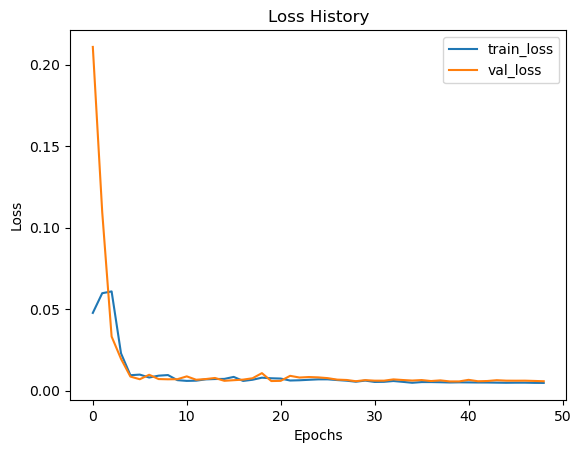

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

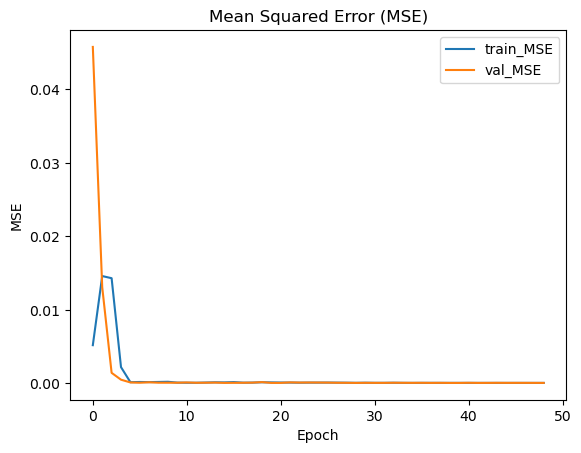

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

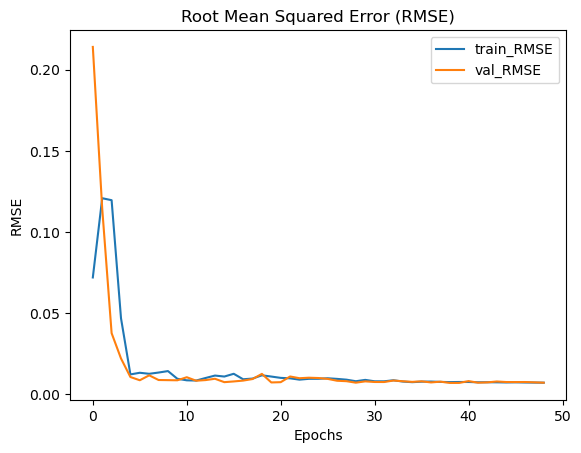

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

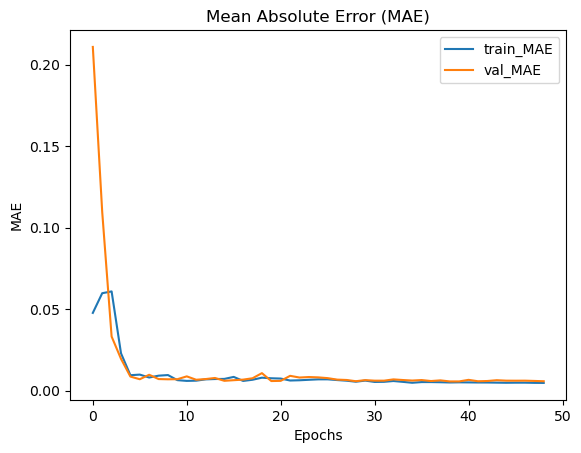

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

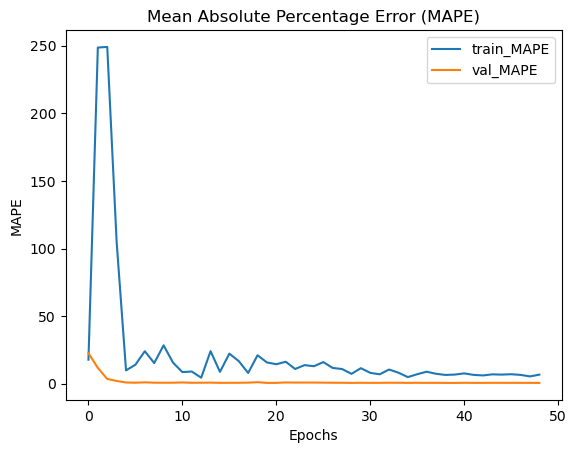

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:08:07.527201: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 2)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


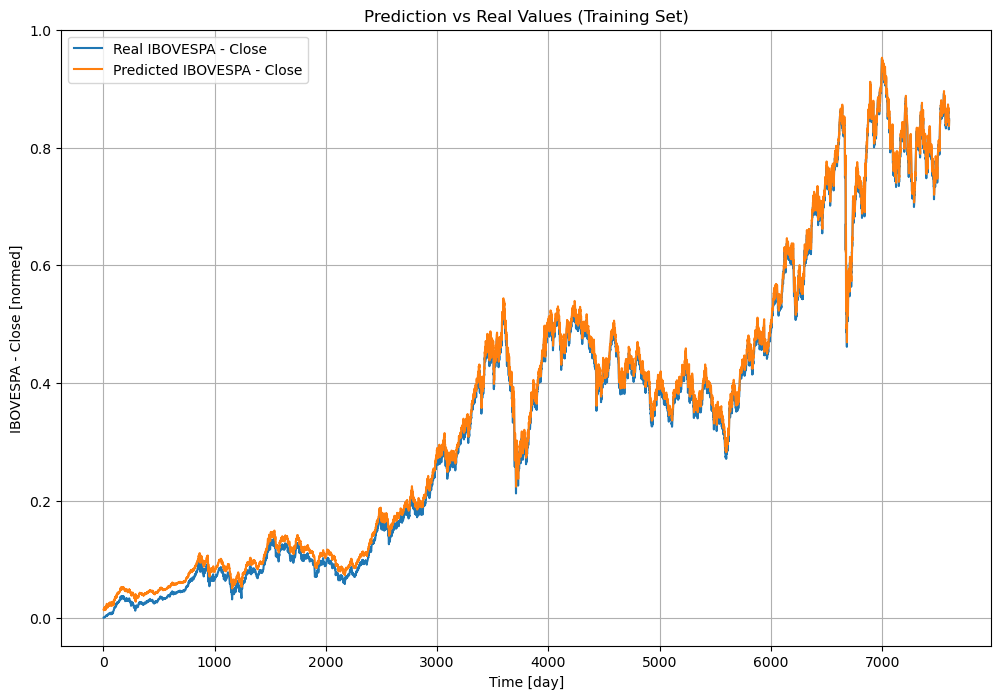

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


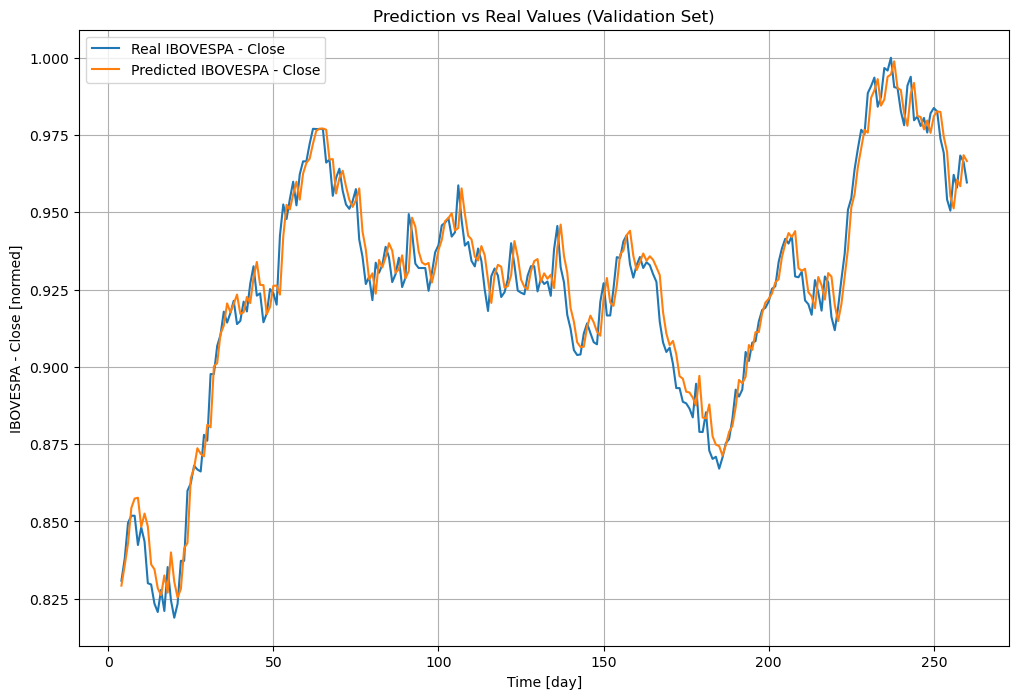

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


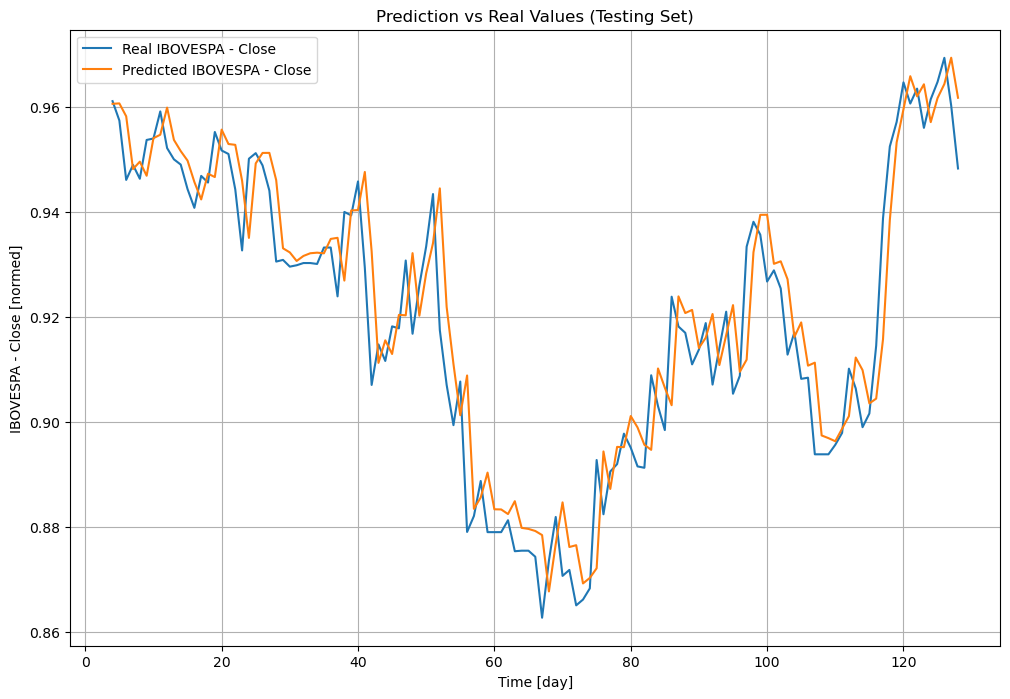

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

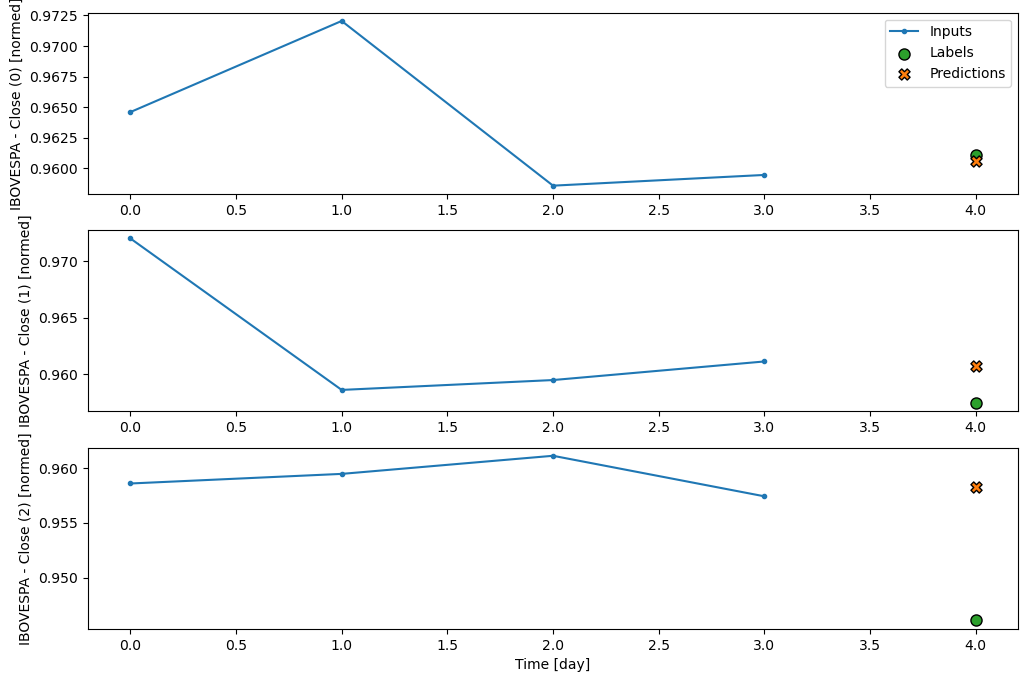

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:28s:237ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[[0.960609  , 0.960609  , 0.960609  , ..., 0.960609  ,
         0.960609  , 0.960609  ]],

       [[0.96068406, 0.96068406, 0.96068406, ..., 0.96068406,
         0.96068406, 0.96068406]],

       [[0.95823145, 0.95823145, 0.95823145, ..., 0.95823145,
         0.95823145, 0.95823145]],

       ...,

       [[0.9643826 , 0.9643826 , 0.9643826 , ..., 0.9643826 ,
         0.9643826 , 0.9643826 ]],

       [[0.96939135, 0.96939135, 0.96939135, ..., 0.96939135,
         0.96939135, 0.96939135]],

       [[0.9617575 , 0.9617575 , 0.9617575 , ..., 0.9617575 ,
         0.9617575 , 0.9617575 ]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')